In [2]:
!pip install pmdarima

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import pmdarima as pm
from pmdarima import auto_arima

## Read the data

In [12]:
%%time
path = "store-department-data"
cols_to_norm = ["Weekly_Sales" ,"Temperature", "Fuel_Price", "CPI", "Unemployment"]
stores_depts = []
print("--------------- Starting Execution -------------")
for i in range(1, 46):
    dirc = f"{path}/store_{i}"
    stre = {}
    for j in range(1, 100):
        try:
            name =  f"store_{i}_dept_{j}"
            st_dt = pd.read_csv(f"{dirc}/Store_{i}_dept_{j}.csv")
            st_dt["Date"] = pd.to_datetime(st_dt['Date'])
            st_dt = st_dt.set_index("Date")
            st_dt[cols_to_norm] = st_dt[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
            stre[f"dept_{j}"] = st_dt
            globals()[name] = st_dt
            print(f"Read and normalized: Store_{i}_dept_{j}.csv")
        except:
            print(f"Store_{i}_dept_{j} skipped.---------------------")
    stores_depts.append(stre)
    print(f"########## Collected for Store {i} ##########")
print("---------------- End of Execution -------------")  

--------------- Starting Execution -------------
Read and normalized: Store_1_dept_1.csv
Read and normalized: Store_1_dept_2.csv
Read and normalized: Store_1_dept_3.csv
Read and normalized: Store_1_dept_4.csv
Read and normalized: Store_1_dept_5.csv
Read and normalized: Store_1_dept_6.csv
Read and normalized: Store_1_dept_7.csv
Read and normalized: Store_1_dept_8.csv
Read and normalized: Store_1_dept_9.csv
Read and normalized: Store_1_dept_10.csv
Read and normalized: Store_1_dept_11.csv
Read and normalized: Store_1_dept_12.csv
Read and normalized: Store_1_dept_13.csv
Read and normalized: Store_1_dept_14.csv
Store_1_dept_15 skipped.---------------------
Read and normalized: Store_1_dept_16.csv
Read and normalized: Store_1_dept_17.csv
Read and normalized: Store_1_dept_18.csv
Read and normalized: Store_1_dept_19.csv
Read and normalized: Store_1_dept_20.csv
Read and normalized: Store_1_dept_21.csv
Read and normalized: Store_1_dept_22.csv
Read and normalized: Store_1_dept_23.csv
Read and nor

Read and normalized: Store_3_dept_4.csv
Read and normalized: Store_3_dept_5.csv
Read and normalized: Store_3_dept_6.csv
Read and normalized: Store_3_dept_7.csv
Read and normalized: Store_3_dept_8.csv
Read and normalized: Store_3_dept_9.csv
Read and normalized: Store_3_dept_10.csv
Read and normalized: Store_3_dept_11.csv
Read and normalized: Store_3_dept_12.csv
Read and normalized: Store_3_dept_13.csv
Read and normalized: Store_3_dept_14.csv
Store_3_dept_15 skipped.---------------------
Read and normalized: Store_3_dept_16.csv
Read and normalized: Store_3_dept_17.csv
Read and normalized: Store_3_dept_18.csv
Read and normalized: Store_3_dept_19.csv
Read and normalized: Store_3_dept_20.csv
Read and normalized: Store_3_dept_21.csv
Read and normalized: Store_3_dept_22.csv
Read and normalized: Store_3_dept_23.csv
Read and normalized: Store_3_dept_24.csv
Read and normalized: Store_3_dept_25.csv
Read and normalized: Store_3_dept_26.csv
Read and normalized: Store_3_dept_27.csv
Read and normaliz

Read and normalized: Store_5_dept_3.csv
Read and normalized: Store_5_dept_4.csv
Read and normalized: Store_5_dept_5.csv
Read and normalized: Store_5_dept_6.csv
Read and normalized: Store_5_dept_7.csv
Read and normalized: Store_5_dept_8.csv
Read and normalized: Store_5_dept_9.csv
Read and normalized: Store_5_dept_10.csv
Read and normalized: Store_5_dept_11.csv
Read and normalized: Store_5_dept_12.csv
Read and normalized: Store_5_dept_13.csv
Read and normalized: Store_5_dept_14.csv
Store_5_dept_15 skipped.---------------------
Read and normalized: Store_5_dept_16.csv
Read and normalized: Store_5_dept_17.csv
Read and normalized: Store_5_dept_18.csv
Read and normalized: Store_5_dept_19.csv
Read and normalized: Store_5_dept_20.csv
Read and normalized: Store_5_dept_21.csv
Read and normalized: Store_5_dept_22.csv
Read and normalized: Store_5_dept_23.csv
Read and normalized: Store_5_dept_24.csv
Read and normalized: Store_5_dept_25.csv
Read and normalized: Store_5_dept_26.csv
Read and normalize

Store_7_dept_15 skipped.---------------------
Read and normalized: Store_7_dept_16.csv
Read and normalized: Store_7_dept_17.csv
Read and normalized: Store_7_dept_18.csv
Read and normalized: Store_7_dept_19.csv
Read and normalized: Store_7_dept_20.csv
Read and normalized: Store_7_dept_21.csv
Read and normalized: Store_7_dept_22.csv
Read and normalized: Store_7_dept_23.csv
Read and normalized: Store_7_dept_24.csv
Read and normalized: Store_7_dept_25.csv
Read and normalized: Store_7_dept_26.csv
Read and normalized: Store_7_dept_27.csv
Read and normalized: Store_7_dept_28.csv
Read and normalized: Store_7_dept_29.csv
Read and normalized: Store_7_dept_30.csv
Read and normalized: Store_7_dept_31.csv
Read and normalized: Store_7_dept_32.csv
Read and normalized: Store_7_dept_33.csv
Read and normalized: Store_7_dept_34.csv
Read and normalized: Store_7_dept_35.csv
Read and normalized: Store_7_dept_36.csv
Store_7_dept_37 skipped.---------------------
Read and normalized: Store_7_dept_38.csv
Store_

Read and normalized: Store_9_dept_10.csv
Read and normalized: Store_9_dept_11.csv
Read and normalized: Store_9_dept_12.csv
Read and normalized: Store_9_dept_13.csv
Read and normalized: Store_9_dept_14.csv
Store_9_dept_15 skipped.---------------------
Read and normalized: Store_9_dept_16.csv
Read and normalized: Store_9_dept_17.csv
Read and normalized: Store_9_dept_18.csv
Read and normalized: Store_9_dept_19.csv
Read and normalized: Store_9_dept_20.csv
Read and normalized: Store_9_dept_21.csv
Read and normalized: Store_9_dept_22.csv
Read and normalized: Store_9_dept_23.csv
Read and normalized: Store_9_dept_24.csv
Read and normalized: Store_9_dept_25.csv
Read and normalized: Store_9_dept_26.csv
Read and normalized: Store_9_dept_27.csv
Read and normalized: Store_9_dept_28.csv
Read and normalized: Store_9_dept_29.csv
Read and normalized: Store_9_dept_30.csv
Read and normalized: Store_9_dept_31.csv
Read and normalized: Store_9_dept_32.csv
Read and normalized: Store_9_dept_33.csv
Read and no

Read and normalized: Store_11_dept_2.csv
Read and normalized: Store_11_dept_3.csv
Read and normalized: Store_11_dept_4.csv
Read and normalized: Store_11_dept_5.csv
Read and normalized: Store_11_dept_6.csv
Read and normalized: Store_11_dept_7.csv
Read and normalized: Store_11_dept_8.csv
Read and normalized: Store_11_dept_9.csv
Read and normalized: Store_11_dept_10.csv
Read and normalized: Store_11_dept_11.csv
Read and normalized: Store_11_dept_12.csv
Read and normalized: Store_11_dept_13.csv
Read and normalized: Store_11_dept_14.csv
Store_11_dept_15 skipped.---------------------
Read and normalized: Store_11_dept_16.csv
Read and normalized: Store_11_dept_17.csv
Read and normalized: Store_11_dept_18.csv
Read and normalized: Store_11_dept_19.csv
Read and normalized: Store_11_dept_20.csv
Read and normalized: Store_11_dept_21.csv
Read and normalized: Store_11_dept_22.csv
Read and normalized: Store_11_dept_23.csv
Read and normalized: Store_11_dept_24.csv
Read and normalized: Store_11_dept_25

Read and normalized: Store_13_dept_5.csv
Read and normalized: Store_13_dept_6.csv
Read and normalized: Store_13_dept_7.csv
Read and normalized: Store_13_dept_8.csv
Read and normalized: Store_13_dept_9.csv
Read and normalized: Store_13_dept_10.csv
Read and normalized: Store_13_dept_11.csv
Read and normalized: Store_13_dept_12.csv
Read and normalized: Store_13_dept_13.csv
Read and normalized: Store_13_dept_14.csv
Store_13_dept_15 skipped.---------------------
Read and normalized: Store_13_dept_16.csv
Read and normalized: Store_13_dept_17.csv
Read and normalized: Store_13_dept_18.csv
Read and normalized: Store_13_dept_19.csv
Read and normalized: Store_13_dept_20.csv
Read and normalized: Store_13_dept_21.csv
Read and normalized: Store_13_dept_22.csv
Read and normalized: Store_13_dept_23.csv
Read and normalized: Store_13_dept_24.csv
Read and normalized: Store_13_dept_25.csv
Read and normalized: Store_13_dept_26.csv
Read and normalized: Store_13_dept_27.csv
Read and normalized: Store_13_dept

Read and normalized: Store_15_dept_8.csv
Read and normalized: Store_15_dept_9.csv
Read and normalized: Store_15_dept_10.csv
Read and normalized: Store_15_dept_11.csv
Read and normalized: Store_15_dept_12.csv
Read and normalized: Store_15_dept_13.csv
Read and normalized: Store_15_dept_14.csv
Store_15_dept_15 skipped.---------------------
Read and normalized: Store_15_dept_16.csv
Read and normalized: Store_15_dept_17.csv
Read and normalized: Store_15_dept_18.csv
Read and normalized: Store_15_dept_19.csv
Read and normalized: Store_15_dept_20.csv
Read and normalized: Store_15_dept_21.csv
Read and normalized: Store_15_dept_22.csv
Read and normalized: Store_15_dept_23.csv
Read and normalized: Store_15_dept_24.csv
Read and normalized: Store_15_dept_25.csv
Read and normalized: Store_15_dept_26.csv
Read and normalized: Store_15_dept_27.csv
Read and normalized: Store_15_dept_28.csv
Read and normalized: Store_15_dept_29.csv
Read and normalized: Store_15_dept_30.csv
Read and normalized: Store_15_d

Read and normalized: Store_17_dept_10.csv
Read and normalized: Store_17_dept_11.csv
Read and normalized: Store_17_dept_12.csv
Read and normalized: Store_17_dept_13.csv
Read and normalized: Store_17_dept_14.csv
Store_17_dept_15 skipped.---------------------
Read and normalized: Store_17_dept_16.csv
Read and normalized: Store_17_dept_17.csv
Read and normalized: Store_17_dept_18.csv
Read and normalized: Store_17_dept_19.csv
Read and normalized: Store_17_dept_20.csv
Read and normalized: Store_17_dept_21.csv
Read and normalized: Store_17_dept_22.csv
Read and normalized: Store_17_dept_23.csv
Read and normalized: Store_17_dept_24.csv
Read and normalized: Store_17_dept_25.csv
Read and normalized: Store_17_dept_26.csv
Read and normalized: Store_17_dept_27.csv
Read and normalized: Store_17_dept_28.csv
Read and normalized: Store_17_dept_29.csv
Read and normalized: Store_17_dept_30.csv
Read and normalized: Store_17_dept_31.csv
Read and normalized: Store_17_dept_32.csv
Read and normalized: Store_17

Read and normalized: Store_19_dept_1.csv
Read and normalized: Store_19_dept_2.csv
Read and normalized: Store_19_dept_3.csv
Read and normalized: Store_19_dept_4.csv
Read and normalized: Store_19_dept_5.csv
Read and normalized: Store_19_dept_6.csv
Read and normalized: Store_19_dept_7.csv
Read and normalized: Store_19_dept_8.csv
Read and normalized: Store_19_dept_9.csv
Read and normalized: Store_19_dept_10.csv
Read and normalized: Store_19_dept_11.csv
Read and normalized: Store_19_dept_12.csv
Read and normalized: Store_19_dept_13.csv
Read and normalized: Store_19_dept_14.csv
Store_19_dept_15 skipped.---------------------
Read and normalized: Store_19_dept_16.csv
Read and normalized: Store_19_dept_17.csv
Read and normalized: Store_19_dept_18.csv
Read and normalized: Store_19_dept_19.csv
Read and normalized: Store_19_dept_20.csv
Read and normalized: Store_19_dept_21.csv
Read and normalized: Store_19_dept_22.csv
Read and normalized: Store_19_dept_23.csv
Read and normalized: Store_19_dept_24.

Read and normalized: Store_20_dept_92.csv
Read and normalized: Store_20_dept_93.csv
Read and normalized: Store_20_dept_94.csv
Read and normalized: Store_20_dept_95.csv
Read and normalized: Store_20_dept_96.csv
Read and normalized: Store_20_dept_97.csv
Read and normalized: Store_20_dept_98.csv
Read and normalized: Store_20_dept_99.csv
########## Collected for Store 20 ##########
Read and normalized: Store_21_dept_1.csv
Read and normalized: Store_21_dept_2.csv
Read and normalized: Store_21_dept_3.csv
Read and normalized: Store_21_dept_4.csv
Read and normalized: Store_21_dept_5.csv
Read and normalized: Store_21_dept_6.csv
Read and normalized: Store_21_dept_7.csv
Read and normalized: Store_21_dept_8.csv
Read and normalized: Store_21_dept_9.csv
Read and normalized: Store_21_dept_10.csv
Read and normalized: Store_21_dept_11.csv
Read and normalized: Store_21_dept_12.csv
Read and normalized: Store_21_dept_13.csv
Read and normalized: Store_21_dept_14.csv
Store_21_dept_15 skipped.---------------

Store_22_dept_86 skipped.---------------------
Read and normalized: Store_22_dept_87.csv
Store_22_dept_88 skipped.---------------------
Store_22_dept_89 skipped.---------------------
Read and normalized: Store_22_dept_90.csv
Read and normalized: Store_22_dept_91.csv
Read and normalized: Store_22_dept_92.csv
Read and normalized: Store_22_dept_93.csv
Read and normalized: Store_22_dept_94.csv
Read and normalized: Store_22_dept_95.csv
Read and normalized: Store_22_dept_96.csv
Read and normalized: Store_22_dept_97.csv
Read and normalized: Store_22_dept_98.csv
Read and normalized: Store_22_dept_99.csv
########## Collected for Store 22 ##########
Read and normalized: Store_23_dept_1.csv
Read and normalized: Store_23_dept_2.csv
Read and normalized: Store_23_dept_3.csv
Read and normalized: Store_23_dept_4.csv
Read and normalized: Store_23_dept_5.csv
Read and normalized: Store_23_dept_6.csv
Read and normalized: Store_23_dept_7.csv
Read and normalized: Store_23_dept_8.csv
Read and normalized: Sto

Read and normalized: Store_24_dept_93.csv
Read and normalized: Store_24_dept_94.csv
Read and normalized: Store_24_dept_95.csv
Read and normalized: Store_24_dept_96.csv
Read and normalized: Store_24_dept_97.csv
Read and normalized: Store_24_dept_98.csv
Read and normalized: Store_24_dept_99.csv
########## Collected for Store 24 ##########
Read and normalized: Store_25_dept_1.csv
Read and normalized: Store_25_dept_2.csv
Read and normalized: Store_25_dept_3.csv
Read and normalized: Store_25_dept_4.csv
Read and normalized: Store_25_dept_5.csv
Read and normalized: Store_25_dept_6.csv
Read and normalized: Store_25_dept_7.csv
Read and normalized: Store_25_dept_8.csv
Read and normalized: Store_25_dept_9.csv
Read and normalized: Store_25_dept_10.csv
Read and normalized: Store_25_dept_11.csv
Read and normalized: Store_25_dept_12.csv
Read and normalized: Store_25_dept_13.csv
Read and normalized: Store_25_dept_14.csv
Store_25_dept_15 skipped.---------------------
Read and normalized: Store_25_dept_

Read and normalized: Store_26_dept_97.csv
Read and normalized: Store_26_dept_98.csv
Read and normalized: Store_26_dept_99.csv
########## Collected for Store 26 ##########
Read and normalized: Store_27_dept_1.csv
Read and normalized: Store_27_dept_2.csv
Read and normalized: Store_27_dept_3.csv
Read and normalized: Store_27_dept_4.csv
Read and normalized: Store_27_dept_5.csv
Read and normalized: Store_27_dept_6.csv
Read and normalized: Store_27_dept_7.csv
Read and normalized: Store_27_dept_8.csv
Read and normalized: Store_27_dept_9.csv
Read and normalized: Store_27_dept_10.csv
Read and normalized: Store_27_dept_11.csv
Read and normalized: Store_27_dept_12.csv
Read and normalized: Store_27_dept_13.csv
Read and normalized: Store_27_dept_14.csv
Store_27_dept_15 skipped.---------------------
Read and normalized: Store_27_dept_16.csv
Read and normalized: Store_27_dept_17.csv
Read and normalized: Store_27_dept_18.csv
Read and normalized: Store_27_dept_19.csv
Read and normalized: Store_27_dept_

Read and normalized: Store_28_dept_97.csv
Read and normalized: Store_28_dept_98.csv
Read and normalized: Store_28_dept_99.csv
########## Collected for Store 28 ##########
Read and normalized: Store_29_dept_1.csv
Read and normalized: Store_29_dept_2.csv
Read and normalized: Store_29_dept_3.csv
Read and normalized: Store_29_dept_4.csv
Read and normalized: Store_29_dept_5.csv
Read and normalized: Store_29_dept_6.csv
Read and normalized: Store_29_dept_7.csv
Read and normalized: Store_29_dept_8.csv
Read and normalized: Store_29_dept_9.csv
Read and normalized: Store_29_dept_10.csv
Read and normalized: Store_29_dept_11.csv
Read and normalized: Store_29_dept_12.csv
Read and normalized: Store_29_dept_13.csv
Read and normalized: Store_29_dept_14.csv
Store_29_dept_15 skipped.---------------------
Read and normalized: Store_29_dept_16.csv
Read and normalized: Store_29_dept_17.csv
Read and normalized: Store_29_dept_18.csv
Read and normalized: Store_29_dept_19.csv
Read and normalized: Store_29_dept_

Read and normalized: Store_30_dept_97.csv
Read and normalized: Store_30_dept_98.csv
Read and normalized: Store_30_dept_99.csv
########## Collected for Store 30 ##########
Read and normalized: Store_31_dept_1.csv
Read and normalized: Store_31_dept_2.csv
Read and normalized: Store_31_dept_3.csv
Read and normalized: Store_31_dept_4.csv
Read and normalized: Store_31_dept_5.csv
Read and normalized: Store_31_dept_6.csv
Read and normalized: Store_31_dept_7.csv
Read and normalized: Store_31_dept_8.csv
Read and normalized: Store_31_dept_9.csv
Read and normalized: Store_31_dept_10.csv
Read and normalized: Store_31_dept_11.csv
Read and normalized: Store_31_dept_12.csv
Read and normalized: Store_31_dept_13.csv
Read and normalized: Store_31_dept_14.csv
Store_31_dept_15 skipped.---------------------
Read and normalized: Store_31_dept_16.csv
Read and normalized: Store_31_dept_17.csv
Read and normalized: Store_31_dept_18.csv
Read and normalized: Store_31_dept_19.csv
Read and normalized: Store_31_dept_

Read and normalized: Store_33_dept_3.csv
Read and normalized: Store_33_dept_4.csv
Read and normalized: Store_33_dept_5.csv
Read and normalized: Store_33_dept_6.csv
Read and normalized: Store_33_dept_7.csv
Read and normalized: Store_33_dept_8.csv
Read and normalized: Store_33_dept_9.csv
Read and normalized: Store_33_dept_10.csv
Read and normalized: Store_33_dept_11.csv
Read and normalized: Store_33_dept_12.csv
Read and normalized: Store_33_dept_13.csv
Read and normalized: Store_33_dept_14.csv
Store_33_dept_15 skipped.---------------------
Read and normalized: Store_33_dept_16.csv
Read and normalized: Store_33_dept_17.csv
Read and normalized: Store_33_dept_18.csv
Store_33_dept_19 skipped.---------------------
Read and normalized: Store_33_dept_20.csv
Read and normalized: Store_33_dept_21.csv
Read and normalized: Store_33_dept_22.csv
Read and normalized: Store_33_dept_23.csv
Read and normalized: Store_33_dept_24.csv
Read and normalized: Store_33_dept_25.csv
Read and normalized: Store_33_d

Read and normalized: Store_34_dept_98.csv
Read and normalized: Store_34_dept_99.csv
########## Collected for Store 34 ##########
Read and normalized: Store_35_dept_1.csv
Read and normalized: Store_35_dept_2.csv
Read and normalized: Store_35_dept_3.csv
Read and normalized: Store_35_dept_4.csv
Read and normalized: Store_35_dept_5.csv
Read and normalized: Store_35_dept_6.csv
Read and normalized: Store_35_dept_7.csv
Read and normalized: Store_35_dept_8.csv
Read and normalized: Store_35_dept_9.csv
Read and normalized: Store_35_dept_10.csv
Read and normalized: Store_35_dept_11.csv
Read and normalized: Store_35_dept_12.csv
Read and normalized: Store_35_dept_13.csv
Read and normalized: Store_35_dept_14.csv
Store_35_dept_15 skipped.---------------------
Read and normalized: Store_35_dept_16.csv
Read and normalized: Store_35_dept_17.csv
Read and normalized: Store_35_dept_18.csv
Read and normalized: Store_35_dept_19.csv
Read and normalized: Store_35_dept_20.csv
Read and normalized: Store_35_dept_

Read and normalized: Store_36_dept_95.csv
Read and normalized: Store_36_dept_96.csv
Read and normalized: Store_36_dept_97.csv
Read and normalized: Store_36_dept_98.csv
Read and normalized: Store_36_dept_99.csv
########## Collected for Store 36 ##########
Read and normalized: Store_37_dept_1.csv
Read and normalized: Store_37_dept_2.csv
Read and normalized: Store_37_dept_3.csv
Read and normalized: Store_37_dept_4.csv
Read and normalized: Store_37_dept_5.csv
Read and normalized: Store_37_dept_6.csv
Read and normalized: Store_37_dept_7.csv
Read and normalized: Store_37_dept_8.csv
Read and normalized: Store_37_dept_9.csv
Read and normalized: Store_37_dept_10.csv
Read and normalized: Store_37_dept_11.csv
Read and normalized: Store_37_dept_12.csv
Read and normalized: Store_37_dept_13.csv
Read and normalized: Store_37_dept_14.csv
Store_37_dept_15 skipped.---------------------
Read and normalized: Store_37_dept_16.csv
Read and normalized: Store_37_dept_17.csv
Read and normalized: Store_37_dept_

Read and normalized: Store_38_dept_92.csv
Read and normalized: Store_38_dept_93.csv
Read and normalized: Store_38_dept_94.csv
Read and normalized: Store_38_dept_95.csv
Read and normalized: Store_38_dept_96.csv
Read and normalized: Store_38_dept_97.csv
Read and normalized: Store_38_dept_98.csv
Read and normalized: Store_38_dept_99.csv
########## Collected for Store 38 ##########
Read and normalized: Store_39_dept_1.csv
Read and normalized: Store_39_dept_2.csv
Read and normalized: Store_39_dept_3.csv
Read and normalized: Store_39_dept_4.csv
Read and normalized: Store_39_dept_5.csv
Read and normalized: Store_39_dept_6.csv
Read and normalized: Store_39_dept_7.csv
Read and normalized: Store_39_dept_8.csv
Read and normalized: Store_39_dept_9.csv
Read and normalized: Store_39_dept_10.csv
Read and normalized: Store_39_dept_11.csv
Read and normalized: Store_39_dept_12.csv
Read and normalized: Store_39_dept_13.csv
Read and normalized: Store_39_dept_14.csv
Store_39_dept_15 skipped.---------------

Read and normalized: Store_40_dept_96.csv
Read and normalized: Store_40_dept_97.csv
Read and normalized: Store_40_dept_98.csv
Read and normalized: Store_40_dept_99.csv
########## Collected for Store 40 ##########
Read and normalized: Store_41_dept_1.csv
Read and normalized: Store_41_dept_2.csv
Read and normalized: Store_41_dept_3.csv
Read and normalized: Store_41_dept_4.csv
Read and normalized: Store_41_dept_5.csv
Read and normalized: Store_41_dept_6.csv
Read and normalized: Store_41_dept_7.csv
Read and normalized: Store_41_dept_8.csv
Read and normalized: Store_41_dept_9.csv
Read and normalized: Store_41_dept_10.csv
Read and normalized: Store_41_dept_11.csv
Read and normalized: Store_41_dept_12.csv
Read and normalized: Store_41_dept_13.csv
Read and normalized: Store_41_dept_14.csv
Store_41_dept_15 skipped.---------------------
Read and normalized: Store_41_dept_16.csv
Read and normalized: Store_41_dept_17.csv
Read and normalized: Store_41_dept_18.csv
Read and normalized: Store_41_dept_

Read and normalized: Store_42_dept_93.csv
Read and normalized: Store_42_dept_94.csv
Read and normalized: Store_42_dept_95.csv
Read and normalized: Store_42_dept_96.csv
Read and normalized: Store_42_dept_97.csv
Read and normalized: Store_42_dept_98.csv
Store_42_dept_99 skipped.---------------------
########## Collected for Store 42 ##########
Read and normalized: Store_43_dept_1.csv
Read and normalized: Store_43_dept_2.csv
Read and normalized: Store_43_dept_3.csv
Read and normalized: Store_43_dept_4.csv
Read and normalized: Store_43_dept_5.csv
Read and normalized: Store_43_dept_6.csv
Read and normalized: Store_43_dept_7.csv
Read and normalized: Store_43_dept_8.csv
Read and normalized: Store_43_dept_9.csv
Read and normalized: Store_43_dept_10.csv
Read and normalized: Store_43_dept_11.csv
Read and normalized: Store_43_dept_12.csv
Read and normalized: Store_43_dept_13.csv
Read and normalized: Store_43_dept_14.csv
Store_43_dept_15 skipped.---------------------
Read and normalized: Store_43_

Read and normalized: Store_44_dept_85.csv
Store_44_dept_86 skipped.---------------------
Read and normalized: Store_44_dept_87.csv
Store_44_dept_88 skipped.---------------------
Store_44_dept_89 skipped.---------------------
Read and normalized: Store_44_dept_90.csv
Read and normalized: Store_44_dept_91.csv
Read and normalized: Store_44_dept_92.csv
Read and normalized: Store_44_dept_93.csv
Read and normalized: Store_44_dept_94.csv
Read and normalized: Store_44_dept_95.csv
Read and normalized: Store_44_dept_96.csv
Read and normalized: Store_44_dept_97.csv
Read and normalized: Store_44_dept_98.csv
Read and normalized: Store_44_dept_99.csv
########## Collected for Store 44 ##########
Read and normalized: Store_45_dept_1.csv
Read and normalized: Store_45_dept_2.csv
Read and normalized: Store_45_dept_3.csv
Read and normalized: Store_45_dept_4.csv
Read and normalized: Store_45_dept_5.csv
Read and normalized: Store_45_dept_6.csv
Read and normalized: Store_45_dept_7.csv
Read and normalized: St

## Visualization for A random Store

<Figure size 900x600 with 0 Axes>

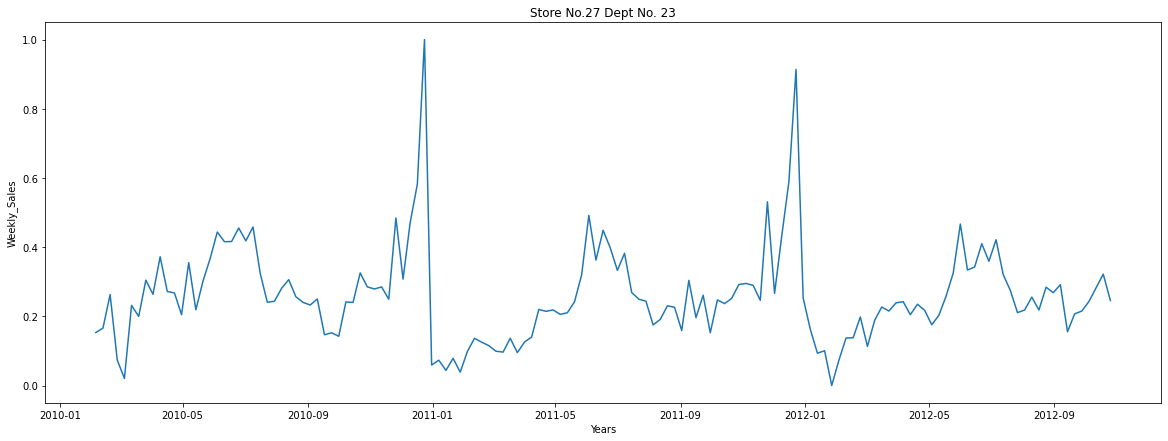

In [13]:
random_store = np.random.choice(range(1, 46))
random_dept = np.random.choice(range(1, 100))
try:
    X = stores_depts[random_store - 1][f"dept_{random_dept}"]
except:
    print(f"Store_{i}_dept_{j} data not avialable.---------------------")
else:
    plt.figure(dpi = 150)
    plt.figure(figsize=(20, 7))
    plt.plot(X["Weekly_Sales"])
    plt.xlabel('Years')
    plt.ylabel('Weekly_Sales')
    plt.title(f"Store No.{random_store} Dept No. {random_dept}")

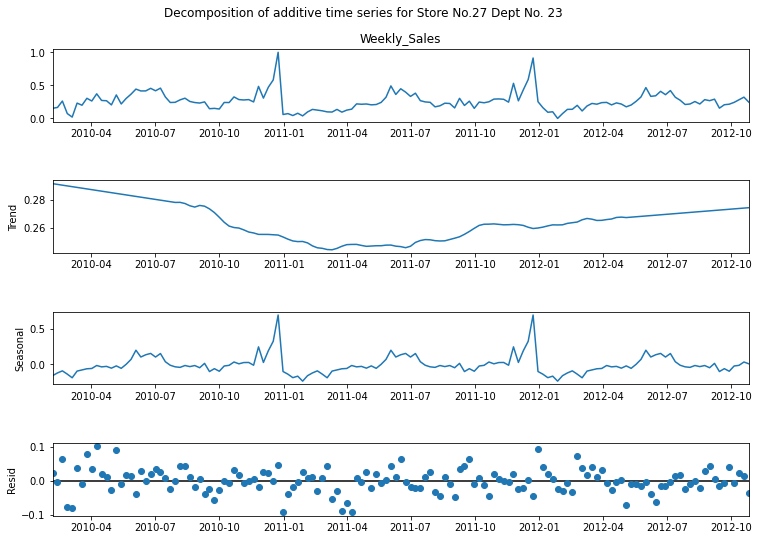

In [15]:
try:
    X = stores_depts[random_store - 1][f"dept_{random_dept}"]
except:
    print(f"Store_{i}_dept_{j} data not avialable.---------------------")
X = X.drop(["Store", "Dept"], axis = 1)
# X_train, X_test = train_test_split(X, test_size= 1/3, shuffle=False)
# model_ar = auto_arima(X_train['Weekly_Sales'], trace=True, error_action='ignore', suppress_warnings=True)
# ft = model_ar.fit(X_train.Weekly_Sales)
# pred = model_ar.predict(X_test.shape[0])

x_decomp = sm.tsa.seasonal_decompose(X["Weekly_Sales"], extrapolate_trend=5)
fig = x_decomp.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle(f'Decomposition of additive time series for Store No.{random_store} Dept No. {random_dept}')
plt.show()

## ARIMA

In [37]:
%%time
models = []
fits = []
predictions = []
print("--------------- Starting Execution -------------")
for i in range(1, 46):
    stor = stores_depts[i-1]
    mod = {}
    fts = {}
    preds = {}
    for j in range(1, 100):
        try:
            X = stor[f"dept_{j}"]
            X = X.drop(["Store", "Dept"], axis = 1)
            X_train, X_test = train_test_split(X, test_size= 1/3, shuffle=False)
            model_ar = auto_arima(X_train['Weekly_Sales'], trace=True, error_action='ignore', suppress_warnings=True)
            ft = model_ar.fit(X_train.Weekly_Sales)
            pred = model_ar.predict(X_test.shape[0])
            mod[f"dept_{j}"] = model_ar
            fts[f"dept_{j}"] = ft
            preds[f"dept_{j}"] = pred
            print(f'MSE in store {i} Dept {j} is {mean_squared_error(X_test["Weekly_Sales"], pred)}')
        except:
            print(f"Store_{i}_dept_{j} data not avialable.---------------------")
    models.append(mod)
    fits.append(fts)
    predictions.append(preds)
print("---------------- End of Execution -------------")  

--------------- Starting Execution -------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=231.979, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=271.930, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=237.303, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=229.169, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=269.956, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=228.640, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=230.615, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=230.624, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=228.716, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=230.653, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=226.662, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=227.196, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=235.310, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=228.639, Time=0.06 se

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=217.713, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=222.038, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=219.288, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=220.740, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=245.141, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=217.957, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=217.076, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=216.257, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=219.076, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=217.956, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=216.368, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.093 seconds
MSE in store 1 Dept 8 is 2.290310321168102
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=239.316, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.615, Time=0

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=61.822, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.149, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75.690, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=188.413, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.182, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=78.104, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=78.766, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64.020, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=63.952, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=76.972, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=70.565, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=64.127, Time=0.38 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=65.493, Time=0.36 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=61.428, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=76.376, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             :

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=260.413, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=260.517, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=258.526, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=260.513, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=265.206, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=257.065, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=267.706, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=257.187, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=259.054, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=259.049, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=263.510, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=257.267, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=261.065, Time=0.08 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.138 seconds
MSE in store 1 Dept 22 is 0.6523392008536639
Performing stepwise search to min

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=181.957, Time=0.34 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 3.441 seconds
MSE in store 1 Dept 28 is 1.0757468494797193
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=233.263, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=264.870, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=230.175, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=243.538, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.949, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=230.753, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=231.043, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=231.277, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=228.265, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=228.858, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=229.149, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=241.620, Time

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=185.427, Time=0.27 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.177 seconds
MSE in store 1 Dept 36 is 0.9398687505489031
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=263.158, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=271.778, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=259.278, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=262.910, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.788, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=259.681, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=259.478, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=261.477, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=257.824, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=258.148, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=257.922, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=261.644, Time

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=142.267, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=138.149, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=138.715, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=138.435, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=140.950, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=140.432, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.759 seconds
MSE in store 1 Dept 45 is 0.6917057409406387
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=249.829, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.748, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=246.443, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=248.329, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=266.426, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=246.931, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=247.401, Time

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=216.471, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.604 seconds
MSE in store 1 Dept 54 is 0.151982682557405
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=225.826, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.779, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=224.815, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=242.482, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.143, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=225.043, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=224.817, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=226.753, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=223.215, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=223.468, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=223.262, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=240.881, Time=

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=238.332, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.138 seconds
MSE in store 1 Dept 71 is 1.3272894128297408
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=295.225, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=298.764, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=297.890, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=298.321, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=296.765, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=299.106, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=299.174, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=297.241, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=297.211, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=299.480, Time=0.10 se

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=200.118, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=257.918, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=258.326, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253.933, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=257.284, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=253.422, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=245.381, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=253.831, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=239.614, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=223.022, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=188.158, Time=0.43 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=176.705, Time=0.55 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=176.752, Time=0.54 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=197.236, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=204.054, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=198.688, Time=0.13 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 2.351 seconds
MSE in store 1 Dept 90 is 2.040076078097212
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=151.971, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=297.671, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=299.606, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=295.672, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=182.169, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=140.142, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=142.443, Time=0.33 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=141.506, Time=0.53 sec

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=212.559, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.633 seconds
MSE in store 1 Dept 96 is 0.9457773989857624
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=206.499, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=294.494, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=294.787, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=292.497, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=216.029, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=193.364, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=194.102, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=191.681, Time=0.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=194.122, Time=0.38 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=188.049, Time=0.65 se

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=284.108, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=274.646, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=273.869, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=275.723, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=275.707, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=275.526, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=271.899, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=275.908, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=271.893, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=272.662, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=273.752, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.061 seconds
MSE in store 2 Dept 4 is 0.7834981222890898
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=259.245, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=286.769, Time=

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=226.058, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=228.423, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=227.165, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=231.730, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=223.741, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=218.528, Time=0.12 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.727 seconds
MSE in store 2 Dept 11 is 0.7463143017805804
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=209.440, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=232.605, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=205.971, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=209.951, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=230.605, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=207.937, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=207.852, Time

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=221.864, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=225.701, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=221.946, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=221.260, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=226.039, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=221.963, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.785 seconds
MSE in store 2 Dept 19 is 0.6614002091300857
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=262.591, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=247.462, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=244.127, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=260.620, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=246.050, Time=0.08 se

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=233.029, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=269.651, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=234.028, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=250.137, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.840, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=232.505, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=238.885, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=230.857, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=232.467, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=230.497, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=232.488, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=233.495, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=229.090, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=232.683, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=231.081, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]  

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=219.044, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=220.879, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=224.976, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=222.119, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=217.233, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=237.649, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=218.434, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=219.065, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=223.124, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=220.288, Time=0.13 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 1.521 seconds
MSE in store 2 Dept 33 is 1.0046733175145486
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=245.455, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=235.848, Time=0.0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=268.528, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=262.596, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=264.544, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=264.545, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=268.581, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=266.544, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.628 seconds
MSE in store 2 Dept 41 is 0.5172620430981602
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=330.613, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=304.757, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=281.638, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=328.614, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=283.636, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=283.636, Time=0.1

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=248.549, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.332, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=250.548, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.748 seconds
MSE in store 2 Dept 52 is 0.6824013244919925
Store_2_dept_53 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=263.913, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=258.019, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=230.576, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=261.955, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=233.700, Time=0.03 sec

Best model:  

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=241.576, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=230.131, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=266.893, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=231.579, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=231.589, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=233.578, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=228.131, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=229.579, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=229.589, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=239.577, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=231.578, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.649 seconds
MSE in store 2 Dept 67 is 1.0707228304059344
Store_2_dept_68 data not avialable.---------------------
Store_2_dept_69 data not avialable.---------------------
Store_2_dept_70 data not avialable.--------------

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.788, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=0.556, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1.041, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1.546, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2.109, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2.165, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-0.543, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1.321, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1.373, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1.033, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3.124, Time=0.22 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.186 seconds
MSE in store 2 Dept 78 is 2.3461205432925865
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=250.097, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=317.506, Time=0.01 sec
 ARIMA(1,1,

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=220.478, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=221.174, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=215.516, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=213.714, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=223.323, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=215.496, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=223.629, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=217.420, Time=0.15 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.353 seconds
MSE in store 2 Dept 85 is 1.120363242030088
Store_2_dept_86 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=255.477, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=282.225, Time=0.02 sec
 ARIMA(

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=252.839, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=252.797, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=260.399, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=257.745, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.359 seconds
MSE in store 2 Dept 94 is 1.0504343696843315
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=227.051, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.722, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=224.873, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=236.275, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=259.932, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=226.053, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=225.105, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=225.436, Time=0.1

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=162.669, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=164.469, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=162.806, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=165.776, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=161.025, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=162.534, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=162.848, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=160.785, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=161.143, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=164.132, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=162.353, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=163.134, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=163.104, Time=0.20 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.890 seconds
MSE in store 3 De

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.456 seconds
MSE in store 3 Dept 10 is 1.1439868615208997
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=116.432, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=223.831, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.867, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=152.636, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=232.786, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=119.318, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=117.742, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=118.292, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=114.176, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=114.517, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=114.355, Time=0.36 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=114.767, Time=0.5

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=138.327, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=140.848, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=135.259, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=167.919, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=152.783, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=136.664, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=136.715, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=148.494, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=139.179, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=138.633, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.055 seconds
MSE in store 3 Dept 18 is 0.9701566533031527
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=302.709, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=272.292, Time=0.0

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=180.406, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=175.252, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=177.226, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=177.228, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=186.587, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.395 seconds
MSE in store 3 Dept 25 is 1.1749705995913542
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=232.340, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=281.239, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=238.834, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=255.428, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=279.267, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=234.121, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=242.831, Time=0.2

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=248.856, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=250.544, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=246.386, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=247.837, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=247.994, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=248.448, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=249.701, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.886 seconds
MSE in store 3 Dept 32 is 1.302297956841694
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=236.707, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=258.439, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=231.115, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=235.278, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=260.187, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=232.697, Time=

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=240.210, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=282.055, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=242.324, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=258.830, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=281.417, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=238.545, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=249.577, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=237.268, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=238.553, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=240.222, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=235.404, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=257.777, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=240.728, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=236.667, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=236.660, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]  

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=277.695, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=275.710, Time=0.14 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=277.668, Time=0.13 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=278.850, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=274.485, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=274.675, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=276.444, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=276.390, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=275.186, Time=0.08 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=277.536, Time=0.13 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 2.067 seconds
MSE in store 3 Dept 52 is 2.3920113362916524
Store_3_dept_53 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=229.190, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=230.937, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=225.484, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=227.209, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=227.241, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=236.048, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=228.978, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.816 seconds
MSE in store 3 Dept 67 is 1.1339901099776049
Store_3_dept_68 data not avialable.---------------------
Store_3_dept_69 data not avialable.---------------------
Store_3_dept_70 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=230.205, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=213.026, Time=0.03 sec
 ARIMA(0,0,1)(0,0,


Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.582 seconds
MSE in store 3 Dept 82 is 1.8021848501708344
Store_3_dept_83 data not avialable.---------------------
Store_3_dept_84 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=229.078, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=220.323, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=214.877, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=227.080, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=213.502, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=214.779, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=218.103, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=211.752, Time=0.05 sec
 ARIMA(0,1,1)(0,0,

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=280.612, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=275.460, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=277.343, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=277.356, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=279.406, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=278.757, Time=0.15 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.902 seconds
MSE in store 3 Dept 96 is 0.5511853033170114
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=167.842, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=188.293, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=177.033, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=164.509, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=186.345, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=165.584, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=165.444, Time

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=243.000, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=257.135, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.793, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=242.973, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=244.949, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=244.908, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=242.921, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=244.909, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=248.324, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=241.045, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=255.169, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=241.099, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=243.031, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=243.031, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=246.386, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]  

 ARIMA(0,0,4)(0,0,0)[0]             : AIC=220.246, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=219.433, Time=0.09 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=222.207, Time=0.40 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 2.797 seconds
MSE in store 4 Dept 11 is 0.9300386126144766
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=218.290, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.850, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=216.024, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=234.806, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=261.117, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=214.553, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=216.537, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=216.496, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=214.527, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=216.506, Time

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=199.940, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=201.025, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=200.579, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=199.289, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=198.550, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=198.851, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=214.584, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=197.553, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=223.546, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=200.461, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=198.204, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=197.754, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=215.599, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=199.919, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=199.618, Time=0.31 sec

Best model:  ARIMA(1,0,1

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=256.801, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=265.003, Time=0.02 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=258.476, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=249.326, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=247.441, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=253.634, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=267.549, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=249.364, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=248.094, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=249.788, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 3.213 seconds
MSE in store 4 Dept 25 is 1.21

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=243.199, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=242.653, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=244.936, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.802 seconds
MSE in store 4 Dept 32 is 1.2679540739259039
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=225.641, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254.581, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=227.924, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=234.197, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=253.390, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223.675, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=227.981, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=229.763, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=225.659, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=226.418, Time

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=172.717, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=172.499, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=174.322, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=170.239, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=171.110, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=170.879, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=175.208, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=172.675, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.897 seconds
MSE in store 4 Dept 41 is 2.0037975322960007
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=211.962, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=243.360, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=221.473, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206.756, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=241.375, Time

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=257.992, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=257.988, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=259.214, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=258.836, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=256.103, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=260.333, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=257.205, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=254.513, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=260.373, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=257.582, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=256.390, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=256.393, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=258.751, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=255.595, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=255.959, Time=0.09 sec

Best model:  ARIMA(1,0,1

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=263.720, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=231.697, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=223.249, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.526, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223.611, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=223.631, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=225.588, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=221.810, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=222.057, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=222.107, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=229.941, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=224.043, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.962 seconds
MSE in store 4 Dept 67 is 1.1555033697345134
Store_4_dept_68 data not avialable.--

 ARIMA(0,1,3)(0,0,0)[0]             : AIC=191.766, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=190.804, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=203.775, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=192.788, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=203.704, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=193.236, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.548 seconds
MSE in store 4 Dept 80 is 0.49256009177075005
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=208.810, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=252.970, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=226.525, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=205.702, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=251.002, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=207.617, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=207.618, Tim

 ARIMA(0,1,4)(0,0,0)[0]             : AIC=187.901, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=195.457, Time=0.19 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=186.129, Time=0.19 sec
 ARIMA(1,1,5)(0,0,0)[0]             : AIC=185.889, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=196.158, Time=0.20 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=184.622, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=193.697, Time=0.18 sec
 ARIMA(2,1,5)(0,0,0)[0]             : AIC=187.849, Time=0.31 sec

Best model:  ARIMA(1,1,4)(0,0,0)[0]          
Total fit time: 5.078 seconds
MSE in store 4 Dept 90 is 3.2682754124379367
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=264.541, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=260.548, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=260.889, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.432, Time=0.0

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=253.497, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=251.065, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=221.428, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=228.595, Time=0.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=223.084, Time=0.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=219.946, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=223.958, Time=0.38 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=220.225, Time=0.57 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=233.951, Time=0.36 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=222.434, Time=0.61 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=217.946, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=219.465, Time=0.34 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=221.958, Time=0.34 sec
 ARIMA(3,1,4)(0,0,0)[0]          

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=290.556, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=292.531, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=292.754, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=288.943, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=292.819, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=289.840, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=290.919, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=290.918, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=291.058, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=289.476, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=292.257, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.066 seconds
MSE in store 5 Dept 5 is 0.3380027374288093
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=307.137, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=300.904, Time=

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=206.930, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=205.997, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=203.523, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=227.647, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=211.079, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=205.441, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=205.451, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=213.490, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=204.691, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=206.883, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.041 seconds
MSE in store 5 Dept 12 is 1.4719589561971242
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=265.714, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=322.234, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=281.593, Time

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=288.156, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=288.972, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=289.225, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=286.161, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=290.489, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.494 seconds
MSE in store 5 Dept 20 is 0.6513002564120551
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=280.851, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=275.848, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=277.480, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=281.359, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=276.765, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=276.831, Time=0.11 se

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=288.564, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=224.965, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=256.947, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=289.627, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=216.221, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=237.247, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=215.355, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=216.039, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=214.302, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=215.986, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=217.362, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=212.706, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=223.610, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=214.378, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=214.433, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]  

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=231.917, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=233.084, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=232.402, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.594 seconds
MSE in store 5 Dept 35 is 1.569536325678371
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=244.449, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=286.013, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=240.128, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=255.054, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=284.118, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=241.068, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=240.852, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=242.810, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=238.141, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=239.075, Time=

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12.322, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12.229, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.772, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=7.178, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8.231, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16.754, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.683 seconds
MSE in store 5 Dept 47 is 1.9655721667826271
Store_5_dept_48 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=108.714, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=113.815, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=103.189, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=107.937, Time=0.03 sec
 ARIMA(0,0,0)(

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=139.445, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=192.006, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=148.325, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=151.757, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190.833, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143.081, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=141.704, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=142.858, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=144.576, Time=0.13 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=137.657, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 A

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=260.410, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=258.504, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=259.782, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=259.487, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=259.393, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=261.021, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.401 seconds
MSE in store 5 Dept 79 is 1.348410482940502
Store_5_dept_80 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=158.607, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=148.670, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=138.306, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=156.740, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=199.008, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=194.084, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=195.201, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=195.616, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=196.366, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=198.019, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.929 seconds
MSE in store 5 Dept 92 is 2.8643709789227856
Store_5_dept_93 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=146.505, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=146.743, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=148.415, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=148.384, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.748, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=150.360, Time=0.07 se

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=147.503, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.588 seconds
MSE in store 6 Dept 3 is 0.994689307300578
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=252.655, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=269.602, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=247.858, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=254.852, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=269.546, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=249.047, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=248.929, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=250.902, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=246.204, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=247.291, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=247.142, Time=0.05 

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=233.030, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=232.962, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=244.832, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=237.152, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=234.333, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.452 seconds
MSE in store 6 Dept 10 is 1.1262772702294794
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=192.079, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=271.363, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=192.617, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=218.863, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=269.364, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=195.041, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=193.150, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=191.412, Time

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=242.411, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=238.134, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=240.056, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=240.069, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=248.207, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=240.542, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.881 seconds
MSE in store 6 Dept 17 is 0.8011679756592498
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=105.694, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=220.586, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.290, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=153.719, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=218.668, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=103.699, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=123.627, Time

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=228.765, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=226.858, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=226.686, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=221.040, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=222.913, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=222.821, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=226.814, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=222.618, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=224.908, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=224.731, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 2.356 seconds
MSE in store 6 Dept 24 is 0.9353774572535863
Performing stepwise search to minimize aic
 A

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=265.883, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.180, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=260.438, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=261.900, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.189, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=262.417, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=262.419, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=264.413, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=258.439, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=260.417, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=260.420, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=259.902, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=262.413, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.777 seconds
MSE in store 6 Dept 32 is 1.041392770422864
Performing stepwise search to mini

 ARIMA(0,1,3)(0,0,0)[0]             : AIC=216.253, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=215.152, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=217.965, Time=0.12 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.491 seconds
MSE in store 6 Dept 38 is 0.5142509203306603
Store_6_dept_39 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=227.342, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=258.052, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=240.082, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=225.786, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=256.132, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=227.772, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=227.771, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=229.768, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=224.176, Time=0.02 se

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=204.483, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=203.909, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=203.646, Time=0.09 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=205.002, Time=0.19 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 2.405 seconds
MSE in store 6 Dept 48 is 1.459093142408931
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=271.306, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=286.225, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=272.921, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=277.735, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=285.324, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=269.095, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=274.807, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=267.307, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=269.135, Time=

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=258.011, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=257.018, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=255.026, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=257.018, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=258.457, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=253.027, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=257.184, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=255.736, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=255.018, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=255.018, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=256.457, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=255.170, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=256.445, Time=0.14 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.255 seconds
MSE in store 6 Dept 58 is 1.2276865590611845
Performing stepwise search to min

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22.663, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22.083, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20.670, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.370 seconds
MSE in store 6 Dept 78 is 0.036648342495418956
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=316.905, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=303.566, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=314.974, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=298.093, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=263.895, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=264.864, Time=0.13 sec
 ARIMA(

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=165.361, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=167.110, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=164.480, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.912 seconds
MSE in store 6 Dept 87 is 0.6449399413197204
Store_6_dept_88 data not avialable.---------------------
Store_6_dept_89 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=260.499, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.336, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=259.951, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=262.668, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.437, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=259.026, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=261.013, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=258.862, Time=0.24 sec
 ARIMA

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=228.103, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.103 seconds
MSE in store 6 Dept 96 is 1.128841051529957
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=256.245, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.254, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=254.390, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=260.212, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.331, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=254.864, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=252.738, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=254.330, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=254.250, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=255.346, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=250.771, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.262, Time=

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=272.007, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=268.091, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=273.693, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=268.286, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=270.001, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=269.981, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=270.154, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=268.961, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.572 seconds
MSE in store 7 Dept 5 is 0.5390090286856335
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=290.712, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=292.066, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=288.987, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=289.902, Time=0.05

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=119.649, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=164.553, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=117.840, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=119.764, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=120.139, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=115.948, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=206.349, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=120.224, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=117.872, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=117.758, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=162.694, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=118.196, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=119.476, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.468 seconds
MSE in store 7 Dept 12 is 0.8003286434215573
Performing stepwise search to min

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=37.517, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=31.493, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=32.112, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=32.769, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=31.951, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.895 seconds
MSE in store 7 Dept 19 is 0.0125275683081335
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222.100, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.157, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=227.541, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=246.150, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.349, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=224.930, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=224.954, Time=0.13 sec

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=256.967, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.461, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=260.358, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=267.808, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=277.009, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=255.199, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=263.497, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=253.745, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=255.388, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=256.240, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=251.746, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=266.126, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=258.488, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=253.391, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=253.202, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]  

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=227.222, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.622, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=222.956, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=236.277, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=261.831, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=224.816, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=224.807, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=226.765, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=221.201, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=223.023, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=223.008, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=235.830, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=224.946, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.780 seconds
MSE in store 7 Dept 33 is 0.9815311230264028
Performing stepwise search to min

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=181.967, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=210.454, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=182.099, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.704 seconds
MSE in store 7 Dept 41 is 1.3790845423634839
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=207.114, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=225.654, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=216.265, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206.361, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=223.667, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=208.182, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=208.005, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=208.355, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=204.466, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=206.301, Time


Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.899 seconds
MSE in store 7 Dept 52 is 1.858199540893948
Store_7_dept_53 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=260.735, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=245.233, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=231.270, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=258.827, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=230.436, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=231.530, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=231.729, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=243.423, Time=0.02 sec
 ARIMA(1,1,2)(0

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=242.720, Time=0.11 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.773 seconds
MSE in store 7 Dept 67 is 1.1800963027368752
Store_7_dept_68 data not avialable.---------------------
Store_7_dept_69 data not avialable.---------------------
Store_7_dept_70 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=291.512, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=292.639, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=292.837, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=289.515, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=291.861, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.696 seconds
MSE in store 7 Dept 71 is 0.5683769932240398
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=293.39

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=135.856, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=110.487, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=114.946, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=134.196, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=109.248, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=113.597, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=111.823, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=111.062, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=114.326, Time=0.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=106.790, Time=0.32 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=107.418, Time=0.34 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=106.839, Time=0.35 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   :

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=228.009, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=227.837, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=227.322, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=229.837, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=224.634, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=226.062, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=226.052, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=225.874, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=225.347, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=227.874, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.000 seconds
MSE in store 7 Dept 98 is 0.6097411814981735
Store_7_dept_99 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.750, Time=0.03 sec
 A

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=240.468, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.860 seconds
MSE in store 8 Dept 7 is 0.8890914656905945
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=230.281, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=230.436, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=231.005, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=231.304, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=248.686, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=229.648, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=232.109, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=228.461, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=230.955, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=231.556, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=228.183, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=245.015, Time=

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=263.512, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=265.463, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=265.426, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=268.360, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=261.633, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=267.991, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=262.548, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=263.584, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=263.546, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=266.380, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=263.129, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=265.365, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.158 seconds
MSE in store 8 Dept 14 is 0.5624803456654687
Store_8_dept_15 data not avialable.---------------------
Performing stepwise search to minimize ai

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=260.381, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=260.160, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=260.054, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=265.703, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=260.682, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=261.811, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.071 seconds
MSE in store 8 Dept 22 is 0.6495642989691844
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=245.854, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=265.998, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=242.119, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=247.764, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=264.388, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=243.625, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=242.854, Time

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=239.819, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=240.636, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=238.043, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=238.207, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=238.345, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.503, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=239.192, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.756 seconds
MSE in store 8 Dept 29 is 0.589087206351237
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=265.446, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=255.247, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=248.030, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=263.539, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=224.422, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=219.729, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=215.242, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=222.752, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=214.933, Time=0.17 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=216.932, Time=0.23 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=216.930, Time=0.25 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=214.626, Time=0.12 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=214.721, Time=0.12 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=215.603, Time=0.14 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=223.074, Time=0.50 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=212.626, Time=0.13 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=212.724, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=213.242, Time=0.06 sec
 ARIMA(2,0,4)(0,0,0)[0]      

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=214.221, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=209.118, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=211.317, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=210.685, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=210.893, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=209.210, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=212.222, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.997 seconds
MSE in store 8 Dept 44 is 1.444001028238662
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29.153, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=30.828, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28.638, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.24

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=72.791, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=85.630, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=66.131, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=66.625, Time=0.43 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=86.819, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=74.275, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=65.206, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=74.710, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=65.608, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=86.026, Time=0.16 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=64.269, Time=0.16 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=66.177, Time=0.17 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=64.786, Time=0.51 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=62.300, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=72.788, Time=0.06 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AI

 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.36 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 2.762 seconds
MSE in store 8 Dept 72 is 0.3204713761280621
Store_8_dept_73 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=254.886, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.914, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=251.984, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=256.103, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.557, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253.982, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=253.982, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=254.730, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=250.355, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=252.345, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=252.349, Time=0.03 sec
 A

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=221.944, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=222.372, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=216.588, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=214.664, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=223.867, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=216.581, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=224.389, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.633 seconds
MSE in store 8 Dept 85 is 1.0778762728750892
Store_8_dept_86 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=128.582, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=158.215, Time=0.06 sec
 ARIMA(1,1

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=246.451, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=244.948, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=252.374, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=252.194, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=251.415, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=246.917, Time=0.17 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.648 seconds
MSE in store 8 Dept 95 is 0.6537493683422088
Store_8_dept_96 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=273.499, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=271.498, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=267.580, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=272.092, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=269.162, Time=0.06 sec
 A

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=272.041, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=271.079, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=268.483, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=273.330, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=268.604, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=266.591, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=277.280, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=268.762, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=268.461, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=268.470, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=271.350, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=266.691, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=268.457, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.459 seconds
MSE in store 9 Dept 5 is 0.4508007405979466
Performing stepwise search to mini

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=237.445, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=234.072, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=238.021, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=232.757, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=234.421, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=236.059, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=232.314, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=244.342, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=234.132, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=233.839, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=237.036, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=235.786, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.131 seconds
MSE in store 9 Dept 13 is 1.3966417750928468
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=257.865, Time

 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=267.201, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=262.641, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=268.873, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=264.014, Time=0.09 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=263.394, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=262.872, Time=0.05 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=265.336, Time=0.11 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0]          
Total fit time: 1.379 seconds
MSE in store 9 Dept 20 is 1.021210251101985
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=278.596, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=255.018, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=251.686, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=276.597, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=215.870, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=215.870, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=217.660, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=215.611, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=213.870, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=231.180, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=215.577, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=211.896, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=234.097, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=215.985, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=213.895, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=213.895, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=229.241, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=213.582, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=212.715, Time=0.13 sec

Best model:  ARIMA(1,0,1

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=229.176, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=226.546, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=227.478, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=226.798, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=228.019, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=228.764, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=228.818, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=224.564, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=225.582, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=224.849, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=226.049, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=225.413, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=231.392, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=227.253, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=226.809, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]  

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=239.809, Time=0.20 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.177 seconds
MSE in store 9 Dept 42 is 1.4635608422354969
Store_9_dept_43 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=200.497, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=191.781, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=189.173, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=198.840, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=189.056, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=192.592, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=190.312, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=193.292, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=188.456, Time=0.05 sec
 ARIMA

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=243.268, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=248.388, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=246.060, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=245.241, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=246.866, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=243.578, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=241.686, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=246.892, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=244.532, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=243.652, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=243.424, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=251.793, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=248.135, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=245.288, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=241.967, Time=0.12 sec

Best model:  ARIMA(2,0,1

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=287.881, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=290.674, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=284.859, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=289.847, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=287.014, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=286.354, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=286.119, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=288.695, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=285.299, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.509 seconds
MSE in store 9 Dept 72 is 0.38886418313399407
Store_9_dept_73 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=279.083, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.367, Time=0.04 sec
 

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=262.749, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=259.260, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=259.603, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=259.961, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.942, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=259.313, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.400 seconds
MSE in store 9 Dept 79 is 1.5015752020846846
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-0.226, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-7.249, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5.259, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5.258, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.035, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3.292, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time:

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=116.692, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.957 seconds
MSE in store 9 Dept 92 is 1.95096394922824
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.145, Time=0.02 sec
Total fit time: 0.016 seconds
MSE in store 9 Dept 93 is 0.5000000000000001
Performing stepwise search to minimize aic


C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=138.370, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=139.035, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=139.163, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.390, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=141.002, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.464 seconds
MSE in store 9 Dept 94 is 1.1380418476189442
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=97.497, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=98.765, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=97.990, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=95.513, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=98.178, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.599

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=287.665, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=264.133, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=296.839, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=262.383, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=261.276, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=285.717, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=263.118, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=263.146, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=261.205, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=263.101, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=263.082, Time=0.18 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.957 seconds
MSE in store 10 Dept 4 is

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=227.298, Time=0.28 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 3.346 seconds
MSE in store 10 Dept 11 is 0.9773446188856729
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=227.020, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=245.776, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=234.293, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=224.735, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=243.838, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=224.431, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=226.210, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=224.780, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=229.569, Time=0.06 sec
 

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=249.788, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=249.551, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=247.552, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=249.551, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=255.853, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=246.172, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=259.621, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=250.483, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=248.172, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=248.172, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=255.221, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=247.465, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.426 seconds
MSE in store 10 Dept 19 is 0.9248833911792961
Performing stepwise search to minimi

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=227.287, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=229.188, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=223.957, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=225.821, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=225.746, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=243.293, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=227.628, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.826 seconds
MSE in store 10 Dept 26 is 0.7271358456014841
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=176.261, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=258.975, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=174.153, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=213.789, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=257.168, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=173.589, Tim

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=227.100, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=224.048, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=225.123, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=225.323, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=240.388, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=225.232, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.716 seconds
MSE in store 10 Dept 34 is 1.0365229173941115
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=200.196, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=237.899, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=199.227, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=216.075, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=242.775, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=196.327, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=198.296, Tim

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=239.756, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=292.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.228, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=235.912, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=290.918, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=237.207, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=237.078, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=239.060, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=234.042, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=235.243, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=235.096, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=261.234, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=237.074, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.006 seconds
MSE in store 10 Dept 42 is 1.37822985198986
Store_10_dept_43 data not avialabl

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=280.415, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=282.246, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=282.269, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=280.511, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=284.351, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.615 seconds
MSE in store 10 Dept 50 is 0.9033568227332792
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25.446, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=27.181, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=27.124, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25.477, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.244 seconds
MSE in store 10 Dept 51 is 1.6748117970812335
Performi

 ARIMA(0,0,3)(0,0,0)[0]             : AIC=202.289, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=201.716, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=204.602, Time=0.32 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.998 seconds
MSE in store 10 Dept 59 is 0.3349888711389693
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=254.781, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.675, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=258.218, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=262.372, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.016, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=252.782, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=252.142, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=253.165, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=257.957, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=254.782, Tim

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=198.254, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=195.037, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=196.083, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=195.650, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=205.396, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=197.431, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.935 seconds
MSE in store 10 Dept 79 is 1.3123553008418363
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=123.836, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=136.556, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=128.812, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=122.194, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=134.634, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=124.039, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=123.895, Tim

 ARIMA(3,1,0)(0,0,0)[0]             : AIC=174.525, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 2.561 seconds
MSE in store 10 Dept 90 is 0.7608011434432337
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=236.649, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.330, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=241.435, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=237.373, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=261.534, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=239.003, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=240.648, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=217.812, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=235.121, Time=0.16 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=219.599, Time=0.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=217.117, Time=0.

MSE in store 10 Dept 97 is 1.3669256017622964
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=202.993, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=217.667, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=200.285, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=200.658, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=216.344, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=202.221, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=201.845, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=202.849, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=198.544, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=200.493, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=200.162, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=199.071, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=201.139, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.6

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=282.484, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=279.523, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=301.524, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=281.064, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=280.965, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=279.016, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=280.941, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=279.641, Time=0.13 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.922 seconds
MSE in store 11 Dept 6 is 0.6629465677880848
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=243.606, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=265.362, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=238.871, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=245.633, Time=0.0

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=242.282, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=241.165, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=243.806, Time=0.08 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 2.569 seconds
MSE in store 11 Dept 12 is 0.9358224141692216
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=225.819, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=258.995, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=251.418, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=256.425, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=258.956, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=225.937, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=225.648, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=243.899, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=228.604, Time=0.

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=264.427, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=250.060, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=251.710, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=251.615, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=249.902, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=251.608, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=253.256, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=248.462, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=256.605, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=251.613, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=250.219, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=250.217, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=252.993, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=248.880, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=252.209, Time=0.11 sec

Best model:  ARIMA(1,0,1

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.830 seconds
MSE in store 11 Dept 26 is 0.8971091408837166
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=184.947, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=252.448, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182.672, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=210.446, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=251.490, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=184.585, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=184.576, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=185.429, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=180.674, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=182.586, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=182.577, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=208.897, Time=0.

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=202.833, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=202.621, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=204.666, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=204.585, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=204.564, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=205.357, Time=0.06 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.38 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 2.437 seconds
MSE in store 11 Dept 34 is 1.8750224411471486
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=209.134, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=238.639, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=204.122, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=215.856, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=239.295, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=205.128, Time=0.

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=216.725, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=220.307, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=214.703, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=216.012, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=223.295, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=217.000, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=216.480, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=214.771, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=218.338, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=218.359, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.395 seconds
MSE in store 11 Dept 42 is 0.7739427878017514
Store_11_dept_43 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=178.175, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=183.633, Time=0.03 

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.903, Time=0.03 sec
Total fit time: 0.028 seconds
MSE in store 11 Dept 50 is 1.25
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=55.017, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56.916, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56.867, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56.527, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.508 seconds
MSE in store 11 Dept 51 is 1.8310840429152289
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=204.049, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=239.771, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=215.902, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=201.236, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]     

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=123.837, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=131.478, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=124.886, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.789 seconds
MSE in store 11 Dept 60 is 0.9393206801254099
Store_11_dept_61 data not avialable.---------------------
Store_11_dept_62 data not avialable.---------------------
Store_11_dept_63 data not avialable.---------------------
Store_11_dept_64 data not avialable.---------------------
Store_11_dept_65 data not avialable.---------------------
Store_11_dept_66 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=236.591, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.894, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=241.288, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=231.931, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]        

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=200.095, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=198.152, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=200.054, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=199.984, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=201.618, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=196.190, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=201.701, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=198.125, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=198.079, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=198.027, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=199.651, Time=0.18 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.595 seconds
MSE in store 11 Dept 80 is 1.5340062870299755
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=285.216, Time=0.

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=246.245, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.616 seconds
MSE in store 11 Dept 90 is 1.144164390005643
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.391, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=266.854, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=259.608, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.403, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=260.692, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=256.113, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=257.162, Time=0.11 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=232.431, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=205.168, Time=0.34 sec
 A

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=257.162, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=258.240, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=254.855, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=256.566, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=255.420, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=259.960, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=256.500, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.814 seconds
MSE in store 11 Dept 97 is 1.128065488589274
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=254.735, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=275.139, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=252.137, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253.356, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=274.778, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253.795, Time

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=254.703, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=254.867, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.121 seconds
MSE in store 12 Dept 5 is 0.6530467390847018
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=282.173, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=284.169, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=284.168, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=283.027, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.659 seconds
MSE in store 12 Dept 6 is 0.8916409340615399
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=259.423, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.795, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] inte

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=218.693, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.002 seconds
MSE in store 12 Dept 12 is 0.8219359251075642
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.833, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=250.157, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=252.944, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=264.953, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=252.103, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=252.072, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=254.063, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=248.278, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=250.223, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=250.193, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=251.073, Time=0.

MSE in store 12 Dept 20 is 1.2970782076574314
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=256.520, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=253.836, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=252.456, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=252.921, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=251.868, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=254.321, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.355 seconds
MSE in store 12 Dept 21 is 1.350338756028731
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=249.298, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=273.624, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=251.753, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=261.997, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=271.625, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] interce

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=192.779, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=190.793, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=192.780, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=209.922, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=189.241, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=227.168, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=190.936, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=191.221, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=191.223, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=208.682, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=189.330, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=193.082, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.233 seconds
MSE in store 12 Dept 28 is 0.8557463903613861
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=252.232, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=247.731, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=243.357, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=243.469, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=247.026, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=242.188, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=242.581, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.668 seconds
MSE in store 12 Dept 35 is 1.2507367686258253
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=182.841, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.767, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=187.366, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=221.875, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.960, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=190.414, Tim

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=226.800, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=226.784, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=226.064, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=228.295, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=228.058, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=228.772, Time=0.17 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.745 seconds
MSE in store 12 Dept 44 is 0.8747710887524206
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114.946, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=115.922, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=115.947, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=113.153, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=117.921, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit t

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=249.911, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=249.796, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=252.915, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=250.697, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=249.973, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=251.708, Time=0.16 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.688 seconds
MSE in store 12 Dept 55 is 0.7466170748234445
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=136.717, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=269.275, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=144.196, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=206.317, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.298, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=143.870, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=143.917, Tim

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=212.180, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=212.254, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=210.379, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=212.228, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=218.706, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=208.379, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=223.619, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=210.646, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=210.255, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=210.229, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=217.100, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=208.557, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.519 seconds
MSE in store 12 Dept 71 is 1.4696216569580622
Performing stepwise search to minimi

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=228.874, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=232.344, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=241.321, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=227.728, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=229.661, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=228.158, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=227.269, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=225.287, Time=0.05 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=227.263, Time=0.09 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=227.453, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=225.135, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=230.382, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=227.037, Time=0.05 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=227.020, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=227.376, Time=0.06 sec
 ARIMA(1,0,4)(0,0,0)[0]  

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=177.870, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177.890, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=175.974, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=177.855, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=206.426, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=174.057, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=236.193, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=175.113, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=175.977, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=175.944, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=204.450, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=174.542, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=177.934, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.191 seconds
MSE in store 12 Dept 95 is 0.31961704485276404
Performing stepwise search to m

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=254.770, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=252.676, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=252.965, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=253.458, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=268.425, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=253.152, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.833 seconds
MSE in store 13 Dept 5 is 0.6259684144129161
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=293.201, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=292.839, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=292.881, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=293.349, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=294.839, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=294.840, Time=0.0

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=193.522, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=279.489, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=194.128, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=228.541, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=277.495, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=192.662, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=217.969, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=192.111, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=193.415, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=194.046, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=190.264, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=226.541, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=192.190, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=191.563, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=190.808, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]  

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=134.788, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=137.414, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=131.535, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=167.662, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=139.974, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=133.053, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=132.767, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=147.255, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=135.631, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=134.499, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.248 seconds
MSE in store 13 Dept 18 is 0.6018568257529361
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222.035, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=265.536, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=216.696, Tim

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=253.295, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=253.286, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=251.486, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=253.193, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=255.105, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=249.519, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=256.941, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=250.393, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=251.320, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=251.227, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=253.172, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=249.543, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=252.458, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.070 seconds
MSE in store 13 Dept 25 is 1.0288950530023728
Performing stepwise search to mi

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=228.002, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=222.084, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=222.525, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=224.072, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=224.068, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=222.149, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=226.068, Time=0.15 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.095 seconds
MSE in store 13 Dept 31 is 0.9293773815812291
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=250.062, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=242.431, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=243.911, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=250.151, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=244.403, Time=0.

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=228.862, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=230.090, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=224.414, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=226.618, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=226.229, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=224.966, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=222.415, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=224.671, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=227.058, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=223.947, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=224.230, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=228.649, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=222.973, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=228.239, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0]      

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=241.721, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=242.891, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=236.310, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=237.592, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=240.894, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=238.202, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=238.231, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=239.939, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=234.311, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=236.203, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=236.232, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=235.594, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=237.939, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.735 seconds
MSE in store 13 Dept 48 is 1.4057918565105376
Performing stepwise search to mi

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=246.797, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 3.179 seconds
MSE in store 13 Dept 54 is 0.2972887990601283
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=231.522, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.676, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=238.081, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=258.841, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=277.235, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=236.390, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=229.858, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=235.735, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=233.790, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=231.737, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=234.161, Time=0.

 ARIMA(0,0,2)(0,0,0)[0]             : AIC=225.743, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=233.508, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=227.636, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.759 seconds
MSE in store 13 Dept 67 is 1.1867636068605814
Store_13_dept_68 data not avialable.---------------------
Store_13_dept_69 data not avialable.---------------------
Store_13_dept_70 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=271.074, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=288.185, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=269.961, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=277.800, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=286.227, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=267.200, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=269.119, Time=0.05 sec
 ARIMA(2,0

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=232.241, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=247.319, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=226.847, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=231.960, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=246.782, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=228.679, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=228.690, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=230.241, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=225.376, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=227.165, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=227.176, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=230.882, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=228.746, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.864 seconds
MSE in store 13 Dept 82 is 1.4017302605682997
Performing stepwise search to mi

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=212.289, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=218.711, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=208.842, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=241.268, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=222.782, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=210.839, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=210.837, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=232.341, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=217.928, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=212.796, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.243 seconds
MSE in store 13 Dept 94 is 1.1686217337904599
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=188.858, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=250.677, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=193.814, Tim

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=238.391, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=235.381, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=237.037, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=237.147, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=246.043, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=236.442, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.002 seconds
MSE in store 14 Dept 2 is 1.181948483939085
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=282.358, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=168.240, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=216.296, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=280.478, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=168.185, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=169.649, Time=0.09

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=207.744, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=216.205, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=208.049, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=206.793, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=209.836, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=210.202, Time=0.18 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.301 seconds
MSE in store 14 Dept 10 is 1.6353716918671388
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=249.039, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.777, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=244.986, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=248.898, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=269.695, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=246.720, Time=0.

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=253.326, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=158.795, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=184.037, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=252.393, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=152.083, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=153.162, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=151.586, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=150.213, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=151.834, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=166.726, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=148.527, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=183.018, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=157.098, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=149.921, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]      

 ARIMA(0,0,3)(0,0,0)[0]             : AIC=256.830, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=258.986, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=257.684, Time=0.18 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 2.333 seconds
MSE in store 14 Dept 24 is 0.8532119495005617
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=239.032, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.943, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=234.043, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=242.726, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.627, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=235.752, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=235.761, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=237.752, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=232.727, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=234.477, Tim

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=235.648, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=230.813, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=231.842, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=231.808, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=244.981, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=233.807, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.575 seconds
MSE in store 14 Dept 31 is 0.6218591482333449
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=262.258, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=264.211, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=258.018, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=259.614, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.506, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=259.494, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=259.670, Tim

MSE in store 14 Dept 38 is 0.8564729662738643
Store_14_dept_39 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=268.184, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=199.495, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=266.327, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=195.917, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=195.168, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=193.129, Time=0.12 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=187.290, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=187.664, Time=0.25 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=187.516, Time=0.20 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=185.917, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=191.405, Time=0.08 sec
 ARIMA(5,1,1)(0,

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=265.507, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.091, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=272.224, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=272.964, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.109, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=263.668, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=266.143, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=266.479, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=265.523, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=267.787, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=263.630, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=262.751, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=264.180, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=265.609, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=260.760, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]  

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=145.847, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=148.255, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=143.141, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=146.715, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=141.270, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=170.195, Time=0.19 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=143.189, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=190.779, Time=0.09 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=144.565, Time=0.38 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=139.273, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=168.246, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=143.861, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=141.145, Time=0.16 sec
 ARIMA(1,0,4)(0,0,0)[0]          

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=293.254, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=259.289, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=242.245, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=291.304, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=244.163, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=244.188, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=243.551, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=241.014, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=242.846, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=242.891, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=257.377, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=242.157, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.248 seconds
MSE in store 14 Dept 74 is 1.7920915947

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14.569, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16.431, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=16.133, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.575, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.213 seconds
MSE in store 14 Dept 78 is 0.8530442185223384
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=204.311, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=273.345, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=224.494, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206.605, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=271.468, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=202.425, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=204.793, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=203.796, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=204.250, Time=0.

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=232.584, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=234.583, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=248.300, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.622 seconds
MSE in store 14 Dept 90 is 1.8068040658889366
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=232.298, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=293.999, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=267.904, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=292.336, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=218.141, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=222.256, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=214.023, Time=0.46 sec
 

 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=248.838, Time=0.19 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=245.777, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=251.266, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=247.634, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=247.665, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=246.677, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=248.319, Time=0.27 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0]          
Total fit time: 3.281 seconds
MSE in store 14 Dept 97 is 0.6585811028903813
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=253.707, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=255.689, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=255.691, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=257.921, Time=0.02 s

MSE in store 15 Dept 5 is 0.4410298655485902
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=296.276, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=293.675, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=292.759, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=293.228, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=294.191, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=294.162, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=293.428, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=295.403, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=292.641, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=293.802, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=292.772, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=293.295, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=294.739, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.65

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=212.883, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=214.402, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=214.256, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=214.034, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=214.531, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=214.134, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=213.611, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=216.034, Time=0.11 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.330 seconds
MSE in store 15 Dept 13 is 1.0205952090586823
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=256.971, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.189, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253.953, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=261.431, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.579, Tim

 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.45 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 5.028 seconds
MSE in store 15 Dept 20 is 1.2112190547058321
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=271.177, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=257.841, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=259.963, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=269.228, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=259.841, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=259.841, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=261.840, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=255.892, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=257.892, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=257.892, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.016, Time=0.02 s

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=173.462, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.964 seconds
MSE in store 15 Dept 28 is 0.7986555344637202
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=259.105, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.790, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=254.799, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=257.925, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=266.251, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=256.672, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=256.717, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=257.327, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=253.083, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=254.945, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=254.993, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=256.287, Tim

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=250.032, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.851, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=252.560, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=251.883, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=251.788, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=256.615, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=250.857, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.627 seconds
MSE in store 15 Dept 35 is 0.9955656497215362
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=230.556, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.387, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=225.723, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=245.265, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.555, Time=0.

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.015 seconds
MSE in store 15 Dept 46 is 1.17470352918864
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20.108, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.482, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22.128, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.567 seconds
MSE in store 15 Dept 47 is 2.64888386225551
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.145, Time=0.02 sec
Total fit time: 0.016 seconds
MSE in store 15 Dept 48 is 0.4999999999999999
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=262.579, Time=0.11 sec


C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=269.102, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=260.991, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=263.865, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.314, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=260.261, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=262.009, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=260.562, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=258.579, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=260.562, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=261.913, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=256.613, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=262.030, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=259.123, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=258.595, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=258.595, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]  

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=215.921, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=219.543, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=213.977, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=216.121, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=216.753, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=217.943, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=215.083, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=210.239, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=213.760, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=214.103, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=217.708, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=212.245, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=214.304, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=214.862, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=215.708, Time=0.21 sec
 ARIMA(3,0,3)(0,0,0)[0]  

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22.921, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24.799, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24.854, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20.954, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.353 seconds
MSE in store 15 Dept 78 is 0.9635255017661771
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=309.088, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=288.388, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=272.585, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=307.089, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=273.176, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=274.210, Time=0.17 sec
 ARIM

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=218.899, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=216.842, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=218.282, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=218.750, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=214.908, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=224.024, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=216.325, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=214.922, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=217.016, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=216.794, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.073 seconds
MSE in store 15 Dept 90 is 1.2037692428611815
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=286.359, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=284.497, Time=0.

MSE in store 15 Dept 96 is 2.0305782576712974
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=215.795, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=285.787, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=215.739, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=233.627, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=287.291, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=217.315, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=216.490, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=217.468, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=214.122, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=215.775, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=215.051, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=233.783, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=215.949, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.6

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=284.044, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=264.497, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=271.383, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=282.090, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=265.169, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=264.866, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=266.796, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=262.608, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=263.291, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=262.995, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=269.462, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=264.926, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.725 seconds
MSE in store 16 Dept 5 is 0.7107646492130818
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=280.178, Time

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=153.934, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=153.832, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=149.960, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=200.204, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=156.046, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=151.935, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=151.910, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=180.707, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=151.842, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.631 seconds
MSE in store 16 Dept 11 is 1.3014564406841
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=127.934, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=283.080, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=140.918, Time=0.08 

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=126.133, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=105.641, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=97.234, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=100.227, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=99.234, Time=0.19 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=98.989, Time=0.18 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=97.095, Time=0.13 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=99.083, Time=0.18 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=95.359, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=98.721, Time=0.10 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=97.273, Time=0.13 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=97.351, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=95.502, Time=0.14 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

Best model:  ARIMA(0,0,4)(0,0,0)[0]       

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=228.034, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=232.717, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=227.498, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=226.608, Time=0.17 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=223.231, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=229.122, Time=0.11 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=225.100, Time=0.21 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=227.228, Time=0.13 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=226.808, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 3.881 seconds
MSE in store 16 Dept 24 is 1.1003038586354823
Performing stepwise search to minimize aic
 ARIM

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=241.900, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=197.371, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=217.515, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=239.930, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=197.677, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=194.185, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=196.266, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=195.540, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=195.816, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=197.202, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=197.725, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=192.227, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=194.307, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=193.579, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=193.857, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]  

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=254.809, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.619 seconds
MSE in store 16 Dept 38 is 1.3125607023874262
Store_16_dept_39 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=153.306, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.483, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=164.663, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=215.078, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.972, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=167.732, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=168.580, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=166.580, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=165.297, Time=0.09 sec
 ARI

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112.411, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=116.099, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=108.206, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=109.851, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=110.028, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=109.392, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=106.870, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=107.994, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=108.565, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=108.710, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=108.103, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=107.690, Time=0.13 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.056 seconds
MSE in store 16 Dept 51 is 1.887378504853569
Performing stepwise search to minimiz

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=176.309, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.955 seconds
MSE in store 16 Dept 59 is 0.7883304182846297
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=219.234, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=231.674, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=216.619, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=219.755, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229.940, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=218.484, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=218.543, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=214.686, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=216.562, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=216.616, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=217.905, Time=0.

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=218.879, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=274.682, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=226.647, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=251.382, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=274.637, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=222.126, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=217.371, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=223.868, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=220.444, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=219.000, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=218.251, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=220.148, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=215.704, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=222.197, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=218.747, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]  

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=100.251, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=96.955, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=97.187, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=98.891, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=97.151, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=98.493, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.856 seconds
MSE in store 16 Dept 90 is 0.7071013239982776
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-43.793, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-39.903, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-45.192, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-47.713, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-40.798, Time=0.00 sec
 A

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=155.953, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=146.095, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=142.769, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=154.007, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=144.722, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=144.721, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=146.721, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=140.771, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=142.723, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=142.722, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=144.102, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=144.722, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.774 seconds
MSE in store 16 Dept 98 is 0.6540670569664156
Store_16_dept_99 data not avialable.

MSE in store 17 Dept 7 is 0.8270424871899408
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=258.718, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.068, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=261.999, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=263.442, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=266.072, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=259.125, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=259.300, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=261.807, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=260.394, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=257.658, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=264.064, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=261.234, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=255.823, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=262.808, Time=0.02 sec
 A

 ARIMA(1,0,3)(0,0,0)[0]             : AIC=256.624, Time=0.17 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 1.060 seconds
MSE in store 17 Dept 14 is 1.181618364002828
Store_17_dept_15 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=66.218, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.826, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=61.711, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=171.742, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=258.985, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63.710, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=63.710, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64.319, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=59.935, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=61.933, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=61.933, Time=0.06 sec
 ARIM

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=260.181, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=262.534, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=256.269, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=259.928, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=258.062, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=258.267, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=258.267, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=260.834, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=258.622, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=259.892, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.070 seconds
MSE in store 17 Dept 23 is 1.0380324361767534
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=242.493, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.149, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=240.472, Tim

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=246.761, Time=0.14 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.120 seconds
MSE in store 17 Dept 29 is 1.126379268298934
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=221.666, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.275, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=219.092, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=234.423, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.294, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=220.167, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=219.648, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=220.321, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=217.189, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=218.283, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=217.783, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=232.464, Time

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=280.567, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=220.608, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=278.567, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=206.984, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=207.199, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=200.930, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=202.509, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=204.227, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=199.312, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=207.177, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=218.659, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=200.500, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             :

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=219.308, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=221.307, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=221.306, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=221.237, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=221.569, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=218.734, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=222.248, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=221.856, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=220.732, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=220.730, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=224.209, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=223.158, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=220.984, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.245 seconds
MSE in store 17 Dept 48 is 1.7131820323738938
Performing stepwise search to mi

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=51.597, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=26.868, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=32.280, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=27.575, Time=0.42 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=27.667, Time=0.45 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=32.484, Time=0.47 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=29.478, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=24.963, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=30.374, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=41.309, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=25.569, Time=0.39 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=25.741, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=58.642, Time=0.08 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=30.577, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=i

MSE in store 17 Dept 72 is 0.5080850418494077
Store_17_dept_73 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=249.358, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.880, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=244.472, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=247.037, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=259.022, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=246.463, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=246.463, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=248.461, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=242.535, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=244.526, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=244.526, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=245.121, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=246.524, Time=0.13 sec

Best mo

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=217.875, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=212.090, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=213.518, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=214.088, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=214.089, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=212.400, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=216.087, Time=0.17 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.258 seconds
MSE in store 17 Dept 85 is 1.3718121933668463
Store_17_dept_86 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=123.341, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=175.484, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=125.837, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=124.793, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=173.547, Time=0.02 

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=197.334, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=197.220, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=215.010, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=196.681, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=198.544, Time=0.14 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.364 seconds
MSE in store 17 Dept 95 is 1.2885684286536099
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=51.292, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=52.041, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=51.154, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=51.242, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=51.955, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=53.724, Time=0.16 sec
 AR

 ARIMA(0,0,1)(0,0,0)[0]             : AIC=272.268, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=259.049, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=260.938, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=260.936, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=264.163, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=259.266, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=262.201, Time=0.10 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.042 seconds
MSE in store 18 Dept 5 is 0.4873984098158301
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=294.127, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=291.293, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=290.880, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=291.284, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=291.790, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=292.161, Time

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=258.793, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=262.317, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=256.688, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=256.930, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=270.250, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=258.496, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=258.656, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=257.134, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=260.476, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.732 seconds
MSE in store 18 Dept 13 is 0.6205903020810538
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=290.267, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=279.655, Time=0.05 s

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=248.913, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=241.248, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=248.888, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=237.598, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.633 seconds
MSE in store 18 Dept 21 is 0.790899060408076
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=271.465, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=280.212, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=271.137, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=274.876, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=278.503, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=269.773, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=271.398, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=269.465, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=270.954, Time

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=256.454, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=259.622, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=256.182, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=257.967, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=260.559, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=254.036, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=254.688, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=254.461, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=256.264, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=256.453, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=253.083, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=255.871, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=254.029, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=253.664, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=255.391, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]  

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=220.194, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.162 seconds
MSE in store 18 Dept 35 is 1.243815249330003
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=190.917, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=258.237, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=188.316, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=214.980, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=256.303, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=190.096, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=190.123, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=186.325, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=188.105, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=188.132, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=213.024, Time=0.0

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=229.569, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=228.037, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=231.696, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=222.685, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=220.688, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=233.147, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=222.684, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=234.690, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=223.799, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.382 seconds
MSE in store 18 Dept 46 is 1.281976587228775
Performing stepwise search to minimize aic
 ARIMA

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=67.878, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=54.949, Time=0.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=53.221, Time=0.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=49.842, Time=0.42 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=48.121, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=112.716, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=49.716, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=139.696, Time=0.08 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=74.603, Time=0.21 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=45.141, Time=0.48 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=47.743, Time=0.50 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=48.751, Time=0.59 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=50.377, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=52.635, Time=0.29 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=289.833, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=276.787, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=275.747, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=276.887, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=275.200, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=276.178, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=274.280, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=276.210, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=278.073, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=272.707, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=276.817, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=274.660, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=274.634, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=273.485, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=276.516, Time=0.13 sec

Best model:  ARIMA(2,0,0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=298.899, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=282.802, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=266.281, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=296.932, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=266.486, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=266.865, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=268.643, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=264.607, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=265.313, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=265.497, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=280.846, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=267.030, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.283 seconds
MSE in store 18 Dept 87 is 0.7158028584789143
Store_18_dept_88 data not avialable.

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=96.901, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=101.200, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=94.070, Time=0.37 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=94.559, Time=0.50 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=93.572, Time=0.60 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=98.091, Time=0.26 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=95.459, Time=0.70 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=95.116, Time=0.76 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=99.928, Time=0.33 sec
 ARIMA(4,0,5)(0,0,0)[0] intercept   : AIC=97.356, Time=0.69 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=94.799, Time=0.50 sec

Best model:  ARIMA(3,0,4)(0,0,0)[0] intercept
Total fit time: 6.110 seconds
MSE in store 18 Dept 97 is 2.366629621197064
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=82.097, Time=0.03 sec
 ARIM

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=236.435, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=269.863, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=239.930, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=232.463, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.959, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=232.917, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=232.943, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=234.893, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=230.539, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=230.978, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=231.007, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=237.965, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=232.955, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.698 seconds
MSE in store 19 Dept 1 is 1.0571975765607058
Performing stepwise search to min

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=309.054, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=289.787, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=289.140, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=282.883, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=282.463, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=280.730, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=281.102, Time=0.06 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=274.109, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=272.218, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=271.887, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=271.447, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=270.029, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=269.806, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]          

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.545, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=118.902, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=189.265, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.561, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=116.136, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=158.782, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=120.896, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=113.456, Time=0.21 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=152.172, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=91.656, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=93.785, Time=0.48 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=92.932, Time=0.36 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=95.153, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=115.359, Time=0.16 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=93.277, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0]       

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=246.122, Time=0.14 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.850 seconds
MSE in store 19 Dept 23 is 1.2105743071230979
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=256.885, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=279.050, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=251.429, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=257.216, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=277.235, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253.336, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=253.336, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=249.589, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=251.499, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=251.500, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=255.402, Time=0.

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=219.724, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=213.874, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=215.782, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=215.805, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=228.797, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=217.749, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.794 seconds
MSE in store 19 Dept 31 is 1.1884667380230143
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=273.126, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=274.208, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=268.849, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=269.169, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=272.244, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=270.790, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=270.806, Tim

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=263.921, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=273.976, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=265.785, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=262.252, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=260.338, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=258.775, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=260.287, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=282.840, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=260.516, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=295.132, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=262.326, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]     

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=243.905, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=246.676, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.872 seconds
MSE in store 19 Dept 46 is 1.191574975658875
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=41.672, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=41.871, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=40.528, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=41.210, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=42.435, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.721 seconds
MSE in store 19 Dept 47 is 1.8705851628937795
Performing stepwis

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=235.940, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=236.610, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=237.713, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=232.869, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=236.893, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=233.856, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=234.522, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=234.362, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=242.240, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=236.836, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=235.197, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=236.303, Time=0.17 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.650 seconds
MSE in store 19 Dept 55 is 0.5907077086464844
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=162.389, Tim

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.025 seconds
MSE in store 19 Dept 71 is 1.0806009429379095
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=289.220, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=296.242, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=287.508, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=290.763, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=294.531, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=286.964, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=287.547, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=287.731, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=285.892, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=287.591, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=290.214, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=284.299, Time=0.

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=256.089, Time=0.12 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.704 seconds
MSE in store 19 Dept 83 is 1.0588402629904252
Store_19_dept_84 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=183.972, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=240.657, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=181.973, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=198.958, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=239.716, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=181.598, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=182.558, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=183.080, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=182.246, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=183.829, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=179.830, Time=0.03 

 ARIMA(5,1,1)(0,0,0)[0]             : AIC=255.079, Time=0.20 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=254.075, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=253.228, Time=0.11 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=250.802, Time=0.31 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=247.865, Time=0.53 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=246.279, Time=0.45 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=247.472, Time=0.32 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=248.225, Time=0.60 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=247.314, Time=0.38 sec
 ARIMA(5,1,4)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=244.106, Time=0.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=255.642, Time=0.30 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=88.460, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90.459, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=90.459, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87.247, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=92.453, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.365 seconds
MSE in store 19 Dept 99 is 0.20278144691275377
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.191, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=240.216, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=241.339, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.307, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=239.488, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=241.408, Time=0.03 sec
 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=315.538, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=282.773, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=313.598, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=281.926, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=259.021, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=258.169, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=258.613, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=256.275, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=255.325, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=256.366, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=258.835, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=253.333, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             :

MSE in store 20 Dept 13 is 0.6996754850323894
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=239.067, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.281, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=237.640, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=249.616, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.325, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=237.791, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=238.028, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=237.205, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=239.161, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=239.894, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=239.633, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=241.195, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=235.248, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=236.078, Time=0.03 sec
 

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=253.683, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=248.159, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=241.238, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=252.679, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=241.813, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=251.697, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=244.667, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=254.228, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=241.291, Time=0.11 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.601 seconds
MSE in store 20 Dept 21 is 1.1829465849139567
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=242.449, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.886, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=244.162, Time=0.

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=158.409, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=153.719, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=181.791, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=164.151, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=155.635, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=155.683, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=222.456, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=169.669, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=158.509, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=156.536, Time=0.14 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.727 seconds
MSE in store 20 Dept 28 is 1.0891164641838162
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=235.918, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=248.567, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=232.930, Tim

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=223.607, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=249.919, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=221.706, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=232.795, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=251.938, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=220.820, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=222.593, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=221.874, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=221.336, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=223.645, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=219.762, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=220.957, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=221.596, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=220.932, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=220.261, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]  

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=229.458, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.717 seconds
MSE in store 20 Dept 44 is 1.1532433437291265
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=74.719, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=80.469, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=80.999, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=78.816, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=73.257, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=76.993, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=73.926, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=72.459, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=73.717, Time=0.05 sec
 ARIMA(4,0

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=219.007, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=226.042, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=220.954, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=224.125, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=224.121, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.532 seconds
MSE in store 20 Dept 52 is 0.7255308864315434
Store_20_dept_53 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=238.485, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=230.333, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=236.558, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=225.707, Time=0.05 sec
 ARIMA(3

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.504, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=236.070, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=236.772, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=259.842, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=236.334, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=236.334, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=238.332, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=234.194, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=234.503, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=234.489, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=234.983, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=236.488, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.758 seconds
MSE in store 20 Dept 67 is 1.2204756868614972
Store_20_dept_68 data not avialable.---------------------
Store_20_dept_69 data not avialable.---

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=252.246, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=289.567, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=258.728, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=252.236, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=287.693, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=253.961, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=254.077, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=252.729, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=251.020, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=252.620, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=252.778, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=256.974, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=251.348, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.762 seconds
MSE in store 20 Dept 79 is 1.1547076787041506
Performing stepwise search to mi

MSE in store 20 Dept 87 is 0.6703716663194549
Store_20_dept_88 data not avialable.---------------------
Store_20_dept_89 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=246.221, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=288.554, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=274.979, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=249.577, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=286.555, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=253.359, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=248.408, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=244.053, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=242.597, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=243.004, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=244.252, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=263.403, Time=0.05 sec
 ARIMA(4,1,0)(0

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=233.070, Time=0.11 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.43 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 4.309 seconds
MSE in store 20 Dept 95 is 2.304970945485319
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=32.754, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=28.553, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=30.980, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=28.102, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=30.083, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=26.178, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=225.521, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.894 seconds
MSE in store 21 Dept 4 is 0.986024737113032
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=263.259, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=281.916, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=262.682, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=267.154, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=279.957, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=264.513, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=264.174, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=265.692, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=260.811, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=262.647, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=262.319, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=265.243, Time=

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=221.837, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=217.968, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=212.115, Time=0.16 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 1.928 seconds
MSE in store 21 Dept 11 is 1.0962234598171445
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=241.194, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.775, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=243.985, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=255.299, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=273.324, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=239.256, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=246.675, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=238.019, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=239.272, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=237.744, Tim

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=234.570, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=236.528, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=236.556, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=237.857, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=238.317, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.257 seconds
MSE in store 21 Dept 19 is 0.48072002208601844
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=244.535, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=258.805, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=244.807, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=241.637, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=256.808, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=243.347, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=243.197, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=259.107, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=261.150, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=256.976, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=258.278, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=257.638, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=265.442, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=259.746, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.811 seconds
MSE in store 21 Dept 26 is 0.7180482472323625
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=184.781, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=258.668, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=181.544, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=203.598, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=256.691, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=182.549, Tim

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.889, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=235.175, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=251.190, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.894, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=235.781, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=235.731, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=237.725, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=233.221, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=233.850, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=233.807, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=249.192, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=235.799, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.627 seconds
MSE in store 21 Dept 34 is 0.8891602743309056
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.

 ARIMA(4,1,1)(0,0,0)[0]             : AIC=234.519, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=232.631, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=230.903, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=229.434, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=231.651, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=244.644, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=231.076, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=230.259, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=242.932, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=232.665, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 3.427 seconds
MSE in store 21 Dept 42 is 0.9627450993413055
Store_21_dept_43 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARI

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=269.244, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=260.358, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=263.124, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.092, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=260.098, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=260.643, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=259.878, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=257.952, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=259.871, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=262.804, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=256.045, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=261.700, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=258.748, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=257.966, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]      

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=244.881, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=269.946, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=258.409, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=241.308, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=267.952, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=240.881, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=242.881, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=242.881, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=240.966, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=252.818, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=240.362, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=240.113, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=240.336, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=256.409, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=242.3

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=240.646, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=249.872, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=241.510, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=243.254, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=260.022, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=240.594, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=242.787, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=243.398, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=242.456, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=242.559, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=243.817, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=245.618, Time=0.06 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.444 seconds
MSE in store 21 Dept 79 is 1.7888576114277452
Performing stepwise search to minimi

MSE in store 21 Dept 87 is 1.2773717677510763
Store_21_dept_88 data not avialable.---------------------
Store_21_dept_89 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=230.869, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=248.740, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=238.177, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=226.921, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=246.744, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=227.219, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=227.159, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=229.159, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=224.921, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=225.220, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=225.159, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=236.179, Time=0.03 sec
 ARIMA(1,1,2)(0

 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=237.077, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=233.238, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=233.899, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=235.140, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=235.077, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=233.240, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0]          
Total fit time: 1.558 seconds
MSE in store 22 Dept 1 is 1.100611810912517
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=243.853, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=250.193, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=244.585, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=247.338, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=251.340, Time=0.02 sec

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=200.694, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=199.675, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=196.883, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=239.654, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=202.991, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=198.754, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=198.712, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=221.962, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=197.714, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=200.084, Time=0.15 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.210 seconds
MSE in store 22 Dept 9 is 0.8635129225206
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=243.965, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=262.624, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=243.795, Time=0.

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=235.509, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.683, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=238.211, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=251.436, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.566, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=235.216, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=240.739, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=234.320, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=234.481, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=233.026, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=235.008, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=235.854, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=232.013, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=237.482, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=234.003, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]  

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=245.206, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=240.714, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=242.330, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=242.241, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=241.468, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=240.490, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=246.477, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.941 seconds
MSE in store 22 Dept 24 is 1.0361218434340131
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=227.922, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.482, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=225.000, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=232.340, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.482, Time=0.

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=219.461, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=214.697, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=215.212, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=216.387, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=216.560, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=215.231, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=217.504, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.922 seconds
MSE in store 22 Dept 31 is 0.8692525285626221
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=274.464, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.619, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=271.969, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=274.120, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.656, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=273.053, Tim

 ARIMA(5,1,2)(0,0,0)[0]             : AIC=231.969, Time=0.32 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=233.666, Time=0.13 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0]          
Total fit time: 3.037 seconds
MSE in store 22 Dept 38 is 1.0605926424005807
Store_22_dept_39 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=326.318, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=288.993, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=324.374, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=282.589, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=279.514, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=278.122, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=276.457, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(4

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25.714, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.205 seconds
MSE in store 22 Dept 47 is 0.48046213495986567
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9.143, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5.182, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7.164, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.170, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.301 seconds
MSE in store 22 Dept 48 is 2.6620977952118023
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=76.657, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=75.895, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AI

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=246.860, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.354 seconds
MSE in store 22 Dept 58 is 0.948444899521772
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=249.271, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=293.838, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=244.124, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=260.444, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=291.996, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=246.123, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=246.123, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=248.028, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=242.159, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=244.158, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=244.158, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.549, Time

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13.016, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14.628, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11.166, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.280 seconds
MSE in store 22 Dept 77 is 0.1358450517378615
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15.866, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17.796, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13.996, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.328 seconds
MSE in store 22 Dept 78 is 0.1503011705875668
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AI

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=244.888, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=246.813, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=246.571, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.558 seconds
MSE in store 22 Dept 87 is 1.6922294860113904
Store_22_dept_88 data not avialable.---------------------
Store_22_dept_89 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=237.956, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.112, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=248.363, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=256.442, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.147, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=235.540, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=250.881, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=235.153, Time=0.10 sec
 AR

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=274.981, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=257.676, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=249.893, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=272.989, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=251.460, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=247.937, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=248.899, Time=1.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=249.541, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=255.679, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.568 seconds
MSE in store 22 Dept 98 is 1.5589117078831984
Store_22_dept_99 data not avialable.------------

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=235.016, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.704, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=231.376, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=247.392, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=274.876, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=233.322, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=233.327, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=233.929, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=229.525, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=231.469, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=231.474, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=245.573, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=232.075, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.829 seconds
MSE in store 23 Dept 7 is 0.6904004119394328
Performing stepwise search to min

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=201.834, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.225 seconds
MSE in store 23 Dept 13 is 1.4349795119075275
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=235.949, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.944, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=231.568, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=244.152, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.671, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=232.918, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=232.919, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=234.912, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=229.603, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=230.935, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=230.935, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=242.483, Tim

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=236.225, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254.400, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=235.947, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=242.490, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=254.688, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=234.930, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=236.730, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=236.837, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=235.254, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=238.626, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=233.315, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=234.597, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=235.062, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=235.192, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=233.609, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]  

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=172.003, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=167.961, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=167.358, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=170.119, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=166.188, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=168.430, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=169.947, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=164.894, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=165.643, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=166.175, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=166.547, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=166.711, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             :

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=255.234, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=308.221, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=278.226, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=252.125, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=306.235, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=252.143, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=251.667, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=252.967, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=253.232, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=255.222, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=249.955, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=250.573, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=250.977, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=251.461, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=250.485, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0]  

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=240.252, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=237.815, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=236.728, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=239.791, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=237.754, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=238.583, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=239.048, Time=0.08 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=239.668, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=234.916, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=238.457, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=237.968, Time=0.06 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=236.045, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=236.060, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=236.838, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=237.759, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0]  

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=195.169, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=237.424, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=203.425, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=190.211, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=235.448, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=191.330, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=191.543, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=193.292, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=189.271, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=189.896, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=190.057, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=201.593, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=191.892, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.224 seconds
MSE in store 23 Dept 58 is 1.2762023126440396
Performing stepwise search to mi

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=203.095, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=203.063, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=235.276, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=207.384, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=201.451, Time=0.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=204.514, Time=0.16 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.707 seconds
MSE in store 23 Dept 74 is 1.2194847308232915
Store_23_dept_75 data not avialable.---------------------
Store_23_dept_76 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12.752, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14.209, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10.980, Time=0.02 sec

Best model:  

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=257.599, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=238.089, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=255.600, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=236.997, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=219.360, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=219.986, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=217.511, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=235.014, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=218.183, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=217.154, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=218

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=195.975, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=219.550, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=192.088, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=242.063, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=194.364, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=194.039, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=194.049, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=217.597, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=192.096, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=195.820, Time=0.20 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.390 seconds
MSE in store 23 Dept 95 is 0.5319175169739276
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=126.683, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=128.826, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=130.557, Tim

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=234.148, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=225.190, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=226.521, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=228.789, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=223.228, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=241.110, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=226.821, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=224.560, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=224.241, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=232.217, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=226.821, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=226.158, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.155 seconds
MSE in store 24 Dept 4 is 1.1022468150342752
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=253.915, Time

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=246.117, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=245.922, Time=0.11 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.827 seconds
MSE in store 24 Dept 10 is 0.9082374271267959
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=273.592, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.836, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=268.025, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=268.323, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.837, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=269.862, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=269.829, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=271.946, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=266.026, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=267.863, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=267.830, Tim

MSE in store 24 Dept 17 is 0.9814886237014114
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=106.313, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=231.529, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.314, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=162.532, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229.544, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=105.256, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=136.067, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=104.909, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=104.693, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=103.359, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=104.531, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=106.529, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=101.420, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=106.400, Time=0.03 sec
 

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=251.461, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=273.409, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=246.279, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=250.791, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=272.785, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=248.251, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=248.234, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=244.706, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=246.695, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=246.688, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=249.660, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.971 seconds
MSE in store 24 Dept 25 is 0.9592430513384884
Performing stepwise search to minimize a

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=270.606, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=271.621, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=266.662, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=268.661, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=268.661, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=267.146, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=269.670, Time=0.19 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.040 seconds
MSE in store 24 Dept 32 is 0.9940609964662362
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=247.139, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=273.079, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=247.001, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=255.157, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=272.856, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=248.989, Tim

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 4.081 seconds
MSE in store 24 Dept 38 is 0.81819861200646
Store_24_dept_39 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=262.667, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=257.735, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=259.080, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=259.185, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=266.449, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=259.120, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.485 seconds
MSE in store 24 Dept 40 is 1.5845070082908626
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=241.927, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.000, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] interce

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=272.233, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=279.938, Time=0.02 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=272.963, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=266.759, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=264.985, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=263.061, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=261.699, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=263.100, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=286.666, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=263.332, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.256 seconds
MSE in store 24 Dept 50 is 0.7240357736535937
Performing stepwise search to minimize aic
 

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=246.643, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=248.582, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=248.587, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=261.464, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.955 seconds
MSE in store 24 Dept 59 is 0.4269775092853058
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=231.017, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=210.569, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=203.434, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=229.102, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=205.254, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=205.324, Time=0.06 sec
 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=270.351, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=244.514, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=244.280, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=268.356, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=245.185, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=245.931, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=246.940, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=242.451, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=243.252, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=244.018, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=242.550, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=245.031, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.004 seconds
MSE in store 24 Dept 79 is 0.8691674947383142
Performing stepwise search to minimi

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=252.473, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=251.816, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=249.833, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=248.189, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=249.828, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=272.929, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=251.828, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.340 seconds
MSE in store 24 Dept 87 is 1.0094930589741595
Store_24_dept_88 data not avialable.---------------------
Store_24_dept_89 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=308.342, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=285.606, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=218.117, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=271.992, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=218.364, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=235.171, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=269.995, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=216.189, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=222.739, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=218.762, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=214.995, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=224.739, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=202.335, Time=0.36 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=203.078, Time=0.34 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=201.712, Time=0.21 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=200.072, Time=0.16 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=222.122, Time=0.11 sec
 ARIMA(1,0,5)(0,0,0)[0] i

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=248.868, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=230.858, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=237.342, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=248.244, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=228.470, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=230.260, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=230.345, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=228.936, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=232.046, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=226.920, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=229.415, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=228.693, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=228.784, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=227.368, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=230.481, Time=0.10 sec

Best model:  ARIMA(2,0,0

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=208.800, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=230.507, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=210.783, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.734 seconds
MSE in store 25 Dept 9 is 1.1047618844933487
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=234.621, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=280.161, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=228.715, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=245.052, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=279.141, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=230.689, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=230.688, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=232.687, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=226.728, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=228.705, Time

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=106.559, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=106.556, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=107.950, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=102.680, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=104.675, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=104.672, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=190.997, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=106.055, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.939 seconds
MSE in store 25 Dept 16 is 0.8255374222107253
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=228.534, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=257.976, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=228.042, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=241.010, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=256.020, Tim

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=258.900, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=273.412, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=252.326, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=252.471, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=253.393, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=248.745, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=250.348, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=250.495, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=256.914, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=251.416, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.602 seconds
MSE in store 25 Dept 24 is 0.7913416048965942
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=240.101, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=283.414, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=234.333, Tim

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=169.414, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=169.397, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=170.471, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=165.511, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=167.488, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=167.468, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=170.262, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=168.554, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.789 seconds
MSE in store 25 Dept 30 is 1.4730969456147687
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.845, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=232.483, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=239.452, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=260.614, Time=0.

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=233.394, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.685, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=230.086, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=247.694, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.481, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=230.401, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=230.296, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=232.292, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=228.097, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=228.401, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=228.296, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=246.009, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=230.292, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.752 seconds
MSE in store 25 Dept 37 is 0.5530943507439823
Performing stepwise search to mi

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=213.740, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.782 seconds
MSE in store 25 Dept 46 is 1.1054054450715334
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21.699, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=24.676, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24.280, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.022, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=19.795, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=19.706, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=20.703, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=18.027, Time=0.03 sec
 ARIMA(1,0,0)

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=218.231, Time=0.50 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=217.847, Time=0.34 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=222.531, Time=0.15 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=215.839, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=214.383, Time=0.27 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=212.737, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=223.245, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=211.341, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=221.713, Time=0.05 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=213.015, Time=0.15 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=221.005, Time=0.10 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 3.095 seconds
MSE in store 25 Dept 55 is 0.3877750941526122
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=142.549, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=279.715, Tim

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=295.598, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=295.086, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=293.243, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=294.986, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=296.966, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=291.853, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=295.488, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=293.608, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=293.696, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=293.597, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=295.628, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=293.478, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=295.473, Time=0.22 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.840 seconds
MSE in store 25 Dept 72 is 0.3546311380682918
Store_25_dept_73 data not aviala

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16.121, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15.214, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14.162, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.408 seconds
MSE in store 25 Dept 78 is 0.05062460229312438
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=306.016, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=277.225, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=304.019, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=275.120, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=274.733, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=274.750, Time=0.11 sec
 ARIMA(

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=229.186, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.615 seconds
MSE in store 25 Dept 87 is 1.0999272593734424
Store_25_dept_88 data not avialable.---------------------
Store_25_dept_89 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=209.904, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=250.668, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=208.159, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=219.337, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=258.732, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=209.745, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=208.981, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=211.171, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=207.441, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=208.713, Time=0.03 sec
 AR

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=236.890, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=245.781, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=237.909, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.848 seconds
MSE in store 25 Dept 97 is 1.1067087008235712
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=51.911, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54.773, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=53.686, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50.741, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=53.323, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=49.839, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=50.000, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=49.996, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=48.150, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=49.986, Time=0.09 sec

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=250.513, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=250.511, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=248.522, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=250.507, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=256.688, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=247.023, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=264.168, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=247.544, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=249.013, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=249.009, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=255.317, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=247.215, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=250.244, Time=0.14 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.169 seconds
MSE in store 26 Dept 5 is 0.4924210280414128
Performing stepwise search to min

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=131.119, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=131.069, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=172.089, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=129.752, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=132.210, Time=0.21 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.441 seconds
MSE in store 26 Dept 12 is 0.822131641538611
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=223.324, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=256.508, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=234.987, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=243.781, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=254.528, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=227.050, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=227.079, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=220.807, Time

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=255.053, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.359, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=250.185, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=257.112, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.516, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=251.814, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=251.618, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=253.251, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=248.271, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=249.889, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=249.683, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=255.245, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=251.303, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.858 seconds
MSE in store 26 Dept 20 is 0.9349125821444565
Performing stepwise search to mi

 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=225.543, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=220.358, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=230.228, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=221.218, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=221.956, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=221.595, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=241.371, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=221.858, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=221.664, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=223.577, Time=0.17 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.539 seconds
MSE in store 26 Dept 27 is 1.001134480391832
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=217.523, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.452, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=217.258, Time

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=242.160, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=246.680, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=244.076, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=244.114, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.193 seconds
MSE in store 26 Dept 34 is 1.0805229784894888
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=254.142, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=275.184, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253.827, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=262.545, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.126, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=250.921, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=252.879, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=252.813, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=251.101, Tim

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=257.859, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=268.192, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=259.764, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.714 seconds
MSE in store 26 Dept 42 is 0.6802544596357682
Store_26_dept_43 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254.035, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=216.296, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=230.803, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=252.044, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=215.193, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=216.705, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=216.929, Time=0.11 sec
 ARI

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=253.441, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=254.930, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=255.028, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=253.228, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=256.883, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.092 seconds
MSE in store 26 Dept 52 is 0.7655209704095083
Store_26_dept_53 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=287.497, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=259.817, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=285.504, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=260.462, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=225.727, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=262.168, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=226.648, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=222.567, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=260.530, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=222.245, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223.850, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=224.114, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=222.835, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=223.512, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=220.430, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=220.811, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=224.760, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=222.009, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=222.285, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]  

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.636, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=256.864, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=258.037, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=259.843, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=258.451, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=257.135, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=259.053, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=255.065, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=256.654, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=255.370, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=256.241, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=257.288, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.952 seconds
MSE in store 26 Dept 79 is 1.2097705389921727
Performing stepwise search to minimi

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=300.458, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=269.040, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=234.079, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=224.674, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=225.619, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=222.914, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=227.556, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=222.439, Time=0.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=229.169, Time=0.13 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=224.418, Time=0.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=226.906, Time=0.29 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC

 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=207.422, Time=0.27 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=199.139, Time=0.53 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=196.779, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=212.422, Time=0.16 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=211.904, Time=0.09 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=197.837, Time=0.40 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=197.996, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=228.090, Time=0.09 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=209.861, Time=0.40 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=205.777, Time=0.20 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=196.898, Time=0.48 sec

Best model:  ARIMA(4,0,2)(0,0,0)[0]          
Total fit time: 6.155 seconds
MSE in store 26 Dept 95 is 1.0206092483642373
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=169.599, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=264.675, Tim

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=94.457, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=112.668, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=94.123, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=91.757, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=129.300, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=98.797, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=92.174, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=92.466, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=178.483, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=110.696, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=92.127, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.29 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 2.135 seconds
MSE in store 27 Dept 3 is 1.191954088276159
Performing stepwise search to minimize aic
 ARIMA

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=247.418, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=249.278, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=244.208, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=246.040, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=246.024, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=251.406, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=247.808, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.716 seconds
MSE in store 27 Dept 10 is 0.9629027993156657
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=257.297, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.983, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=251.776, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=258.845, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.338, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253.537, Tim

 ARIMA(1,0,2)(0,0,0)[0]             : AIC=252.599, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=254.741, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=251.437, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=253.706, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.063 seconds
MSE in store 27 Dept 17 is 0.9043435090972932
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=95.270, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=241.203, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=104.731, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=160.786, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=239.465, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=95.527, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=93.566, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=95.217, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=92.038, Time=0.0

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=244.065, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.147, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=238.553, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=249.865, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.284, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=240.549, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=240.549, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=237.051, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=239.035, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=239.037, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=249.191, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.017 seconds
MSE in store 27 Dept 25 is 0.87997524272614

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=214.189, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=231.509, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=216.122, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.702 seconds
MSE in store 27 Dept 31 is 0.9407615885482631
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=274.263, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=268.414, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=269.778, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=272.346, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=269.864, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=269.800, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=271.796, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=266.454, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=267.897, Time=0.

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=287.855, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.063 seconds
MSE in store 27 Dept 40 is 1.0398902649296955
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=245.815, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=258.804, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=242.772, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=248.544, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=256.822, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=242.350, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=244.291, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=243.860, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=242.682, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=245.842, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=240.389, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=240.795, Tim

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=277.354, Time=0.14 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 2.873 seconds
MSE in store 27 Dept 50 is 0.9604750361329287
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22.032, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.433, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23.791, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9.913, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16.826, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.635 seconds
MSE in store 27 Dept 51 is 3.5723231332461354
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=199.632, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=238.339, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=238.706, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=239.853, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.911 seconds
MSE in store 27 Dept 60 is 19.236269280907877
Store_27_dept_61 data not avialable.---------------------
Store_27_dept_62 data not avialable.---------------------
Store_27_dept_63 data not avialable.---------------------
Store_27_dept_64 data not avialable.---------------------
Store_27_dept_65 data not avialable.---------------------
Store_27_dept_66 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=248.667, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.549, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=245.974, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=245.275, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]        

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=262.864, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=262.985, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=264.921, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=259.873, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=261.255, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=261.329, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=277.012, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=263.198, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.284 seconds
MSE in store 27 Dept 79 is 0.8466750555930918
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=255.832, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.086, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=252.831, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=255.241, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.301, Tim

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=245.315, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=246.689, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=246.437, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=244.616, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=246.377, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=248.368, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=244.124, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=246.399, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=245.807, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=245.722, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=245.069, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=247.719, Time=0.14 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.667 seconds
MSE in store 27 Dept 91 is 0.670586223588259
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=281.365, Time

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=261.541, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=263.252, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=263.261, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=264.842, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=261.374, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=262.377, Time=0.06 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=263.250, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=264.559, Time=0.05 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=262.360, Time=0.08 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=265.246, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=261.577, Time=0.06 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 2.254 seconds
MSE in store 27 Dept 98 is 1.2302420117849129
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 s

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=289.291, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=289.289, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=290.182, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=291.106, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.906 seconds
MSE in store 28 Dept 6 is 0.4796181548093257
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=267.362, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=279.506, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=263.609, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=267.952, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=277.530, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=265.311, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=265.347, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=265.832, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=261.651, Time

 ARIMA(3,1,3)(0,0,0)[0]             : AIC=218.019, Time=0.25 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 3.893 seconds
MSE in store 28 Dept 12 is 1.1189933523766953
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.949, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=264.988, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=265.896, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.472, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=266.062, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=265.925, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=268.890, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=265.440, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.858 seconds
MSE in store 28 Dept 13 is 1.2273975957113992
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=219.083, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=241.716, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=229.076, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=216.144, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=239.733, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=215.093, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=216.963, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=216.940, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=215.447, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=224.711, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=214.660, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=214.990, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=227.128, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=216.612, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=216.606, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]  

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=210.023, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=273.378, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=210.724, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=237.575, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=272.308, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=210.007, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=228.964, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=208.201, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=210.140, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=208.849, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=206.234, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=235.946, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=208.724, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=208.171, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=208.034, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]  

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=257.927, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=261.846, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=258.957, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=254.875, Time=0.43 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=251.973, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=257.942, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=255.989, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=259.906, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=257.014, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=252.925

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=234.626, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=236.568, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=236.520, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=238.828, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=233.167, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=238.009, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=233.479, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=235.098, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=235.043, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=237.845, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=234.218, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.326 seconds
MSE in store 28 Dept 42 is 1.3373060840234157
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.145, Time=0.02 sec
Total fit time: 0.016 seconds
MSE in s

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=253.387, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=259.479, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=250.883, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253.668, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=257.610, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=251.101, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=250.392, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=252.358, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=252.358, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=252.864, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=248.392, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=251.729, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=248.909, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=250.358, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=250.358, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]  

 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=248.885, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=250.163, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=250.375, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=246.572, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=248.593, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=247.769, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=248.397, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=248.202, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=251.778, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=250.248, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=249.634, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=249.750, Time=0.14 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.797 seconds
MSE in store 28 Dept 55 is 0.7530011675391449
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=182.245, Tim

MSE in store 28 Dept 72 is 0.17053815371509917
Store_28_dept_73 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=270.082, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=243.278, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=243.956, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=268.085, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=244.890, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=244.209, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=241.317, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=242.949, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=242.349, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=242.324, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=241.707, Time=0.13 sec

Best model:  A

MSE in store 28 Dept 83 is 0.49884127583998056
Store_28_dept_84 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=229.453, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=285.492, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=237.835, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=259.950, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=284.120, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=228.622, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=248.579, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=226.834, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=228.641, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=229.440, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=224.917, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.281, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=235.870, Time=0.03 sec
 ARIMA(

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=264.571, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=269.925, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=260.625, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=268.099, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=266.697, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=262.624, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=262.623, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=268.763, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=268.201, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=264.492, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.339 seconds
MSE in store 28 Dept 94 is 0.9354928431957082
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=321.923, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=310.270, Time=0.

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=181.508, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=172.960, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=173.878, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=171.879, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=173.878, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=175.804, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=169.882, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=176.136, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=171.882, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=171.882, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=170.964, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=173.807, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.217 seconds
MSE in store 29 Dept 3 is 0.9339146712365656
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.4

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=222.133, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=220.939, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=220.800, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=222.904, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=218.486, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=218.736, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=220.150, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=218.959, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=218.812, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=220.926, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.001 seconds
MSE in store 29 Dept 11 is 1.068799761125076
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=221.797, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.857, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=235.274, Time

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=179.737, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=179.704, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=180.763, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=176.049, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=179.117, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=176.618, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=177.975, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=177.935, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=179.696, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=177.549, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=179.845, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.003 seconds
MSE in store 29 Dept 19 is 0.1973908887024495
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=261.162, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=291.803, Tim

MSE in store 29 Dept 25 is 1.2129324053336197
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=252.055, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=279.249, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=254.945, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=266.314, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=277.279, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=251.809, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=255.973, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=251.656, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=250.363, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=249.606, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=251.337, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=252.169, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=247.626, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=252.970, Time=0.02 sec
 

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=248.357, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.426, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=245.833, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=249.901, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.803, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=247.227, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=247.256, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=247.823, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=244.024, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=245.447, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=245.470, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=248.197, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=246.240, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.937 seconds
MSE in store 29 Dept 33 is 0.9480471324962866
Performing stepwise search to mi

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=266.305, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=269.801, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=265.307, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=266.568, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=265.692, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=263.681, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=270.645, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=267.121, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=264.960, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=264.714, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=268.491, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=264.143, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=265.739, Time=0.29 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.473 seconds
MSE in store 29 Dept 42 is 0.9213623336100417
Performing stepwise search to mi

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=221.792, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=218.842, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=219.375, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=220.278, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=214.426, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=214.195, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=216.740, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=214.947, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=240.588, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=214.947, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=216.409, Time=0.16 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 2.549 seconds
MSE in store 29 Dept 54 i

 ARIMA(0,0,2)(0,0,0)[0]             : AIC=234.528, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=238.823, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=235.975, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.754 seconds
MSE in store 29 Dept 67 is 1.2574813234335676
Store_29_dept_68 data not avialable.---------------------
Store_29_dept_69 data not avialable.---------------------
Store_29_dept_70 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=274.140, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=282.091, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=277.032, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=278.795, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=280.386, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=277.892, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=277.977, Time=0.14 sec
 ARIMA(3,0

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=192.566, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=254.693, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=201.691, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=209.964, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=253.032, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=190.802, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=189.228, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=190.730, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=196.397, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=192.686, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=187.298, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=208.149, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=188.859, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=188.785, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=194.442, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]  

MSE in store 29 Dept 95 is 1.2918770043361596
Store_29_dept_96 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=300.364, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=290.733, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=298.466, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=283.715, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=271.172, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=268.541, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=269.937, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=266.939, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=268.875, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] 

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=237.768, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=232.031, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=234.020, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=234.012, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=246.853, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=235.814, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.765 seconds
MSE in store 30 Dept 6 is 0.43226336510727353
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=218.746, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=223.790, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=218.912, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=214.817, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=221.791, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=214.847, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=214.783, Tim

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=299.295, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=300.973, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=294.963, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=296.721, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=299.467, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=296.531, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=295.741, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=297.577, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=293.447, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=295.024, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=294.239, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=295.205, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=296.067, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.644 seconds
MSE in store 30 Dept 14 is 0.4406151561649096
Store_30_dept_15 data not aviala

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.636, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16.740, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.335 seconds
MSE in store 30 Dept 24 is 0.472475798898794
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=211.258, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=227.587, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=218.576, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=208.232, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=225.592, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=209.305, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=208.845, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=209.568, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=206.283, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=207.390, Time=0.05 

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.351, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21.235, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20.025, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.296 seconds
MSE in store 30 Dept 34 is 0.3049469818871972
Store_30_dept_35 data not avialable.---------------------
Store_30_dept_36 data not avialable.---------------------
Store_30_dept_37 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=258.432, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.272, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=258.390, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=259.085, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=259.326, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=259.736, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=259.177, Time=0.07 sec
 ARIMA(2,0,1)

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190.408, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=185.393, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=181.648, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=188.499, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=182.124, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=179.689, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=180.161, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=183.459, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.216 seconds
MSE in store 30 Dept 56 is 0.5755044829495449
Store_30_dept_57 data not avialable.----------------

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=235.308, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=236.733, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=205.252, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=208.989, Time=0.16 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=207.057, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=204.259, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=216.554, Time=0.46 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=205.021, Time=0.52 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=204.248, Time=0.54 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=229.847, Time=0.34 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=206.986, Time=0.63 sec
 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=206.949, Time=0.42 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=213.918, Time=0.62 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=204.924, Time=0.72 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=203.686, Time=0.48 sec
 ARIMA(2,1,4)(0,0,0)[0]  

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=274.151, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=274.906, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=280.109, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=271.251, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=276.637, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=270.290, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=271.880, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=275.167, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=268.292, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=275.782, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=274.251, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=269.880, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=269.260, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=277.132, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=274.367, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]  

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=259.621, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=259.605, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=264.875, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=259.713, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=262.555, Time=0.06 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=261.358, Time=0.20 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 3.046 seconds
MSE in store 30 Dept 96 is 0.8156961809392681
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=276.505, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=305.107, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=288.687, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=271.504, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=303.159, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=272.529, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=272.633, Tim

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=259.466, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.623 seconds
MSE in store 31 Dept 4 is 0.7251229176495201
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=256.991, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=282.208, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=251.833, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=260.682, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=281.170, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253.550, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=253.396, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=254.640, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=250.383, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=252.080, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=251.912, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=259.468, Time

 ARIMA(5,0,2)(0,0,0)[0]             : AIC=227.708, Time=0.30 sec

Best model:  ARIMA(4,0,1)(0,0,0)[0]          
Total fit time: 4.723 seconds
MSE in store 31 Dept 11 is 1.003658780271469
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.632, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=265.083, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=271.171, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.765, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=255.561, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=249.903, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=249.255, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=249.715, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=250.132, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=248.480, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=247.704, Time=0.1

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=145.048, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.047 seconds
MSE in store 31 Dept 18 is 0.4991295235009414
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=279.432, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=275.983, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=276.318, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=276.643, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=274.186, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=276.137, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.327 seconds
MSE in store 31 Dept 19 is 0.9245203490113244
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=253.582, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=279.083, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=259.340, Time=0.06 sec
 ARIMA(0,1,1)(0,0,

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=171.456, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=173.451, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=173.450, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=205.917, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.154 seconds
MSE in store 31 Dept 27 is 0.5561409168805462
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=143.831, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.463, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=144.196, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=214.879, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=277.226, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=142.739, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=182.065, Time=0.06 s

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.359 seconds
MSE in store 31 Dept 33 is 0.9503077467521935
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=212.592, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=230.645, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=215.712, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=208.429, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=228.679, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=210.396, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=210.396, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=212.396, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=207.071, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=209.063, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=209.063, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=213.896, Time=0.

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=275.750, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=275.164, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=277.227, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=273.093, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=275.331, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=275.023, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=274.809, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=273.787, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=276.185, Time=0.15 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.123 seconds
MSE in store 31 Dept 42 is 0.864499607113704
Store_31_dept_43 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=201.282, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=225.258, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=204.678, Time=0.09 s

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=248.529, Time=0.17 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.682 seconds
MSE in store 31 Dept 54 is 0.7028390340921405
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=259.088, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=284.062, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=262.652, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=272.367, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=282.784, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=262.823, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=257.204, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=261.121, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=260.141, Time=0.06 sec
 

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=246.790, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=252.477, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=246.683, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=246.124, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=244.298, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=246.245, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=247.880, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=243.624, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=251.575, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=245.585, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=245.489, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=245.989, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=247.229, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.263 seconds
MSE in store 31 Dept 71 is 0.8151833356522861
Performing stepwise search to mi

 ARIMA(2,1,0)(0,0,0)[0]             : AIC=248.276, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=229.147, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=229.335, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=231.136, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=231.135, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=229.329, Time=0.06 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=229.580, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=231.017, Time=0.14 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total fit time: 2.673 seconds
MSE in store 31 Dept 81 is 0.8587038649622922
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=225.507, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=233.122, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=220.193, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=222.072, Time=0.

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=218.956, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=219.515, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=247.662, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=217.673, Time=0.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=219.617, Time=0.12 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=221.399, Time=0.46 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=216.228, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=217.604, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=218.161, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=218.029, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=216.840, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=219.816, Time=0.33 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0]          
Total fit time: 2.707 seconds
MSE in store 31 Dept 92 is 6.187316627520562
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=231.932, Time

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=236.122, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=239.194, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=237.674, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=235.707, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=239.335, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=237.785, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=233.050, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=234.152, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=237.226, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=234.473, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=235.685, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=237.781, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=233.716, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=237.338, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=235.789, Time=0.16 sec

Best model:  ARIMA(1,0,2

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=222.307, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=262.129, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=220.490, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=234.125, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=260.198, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=222.486, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=222.486, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=223.029, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=218.493, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=220.489, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=220.489, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=232.139, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=221.033, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.871 seconds
MSE in store 32 Dept 7 is 0.9522757028987489
Performing stepwise search to min

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=270.506, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=267.043, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=268.710, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=268.439, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=271.353, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=268.612, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.908 seconds
MSE in store 32 Dept 14 is 0.7354111138561906
Store_32_dept_15 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=93.884, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=275.960, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=101.097, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=178.221, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=273.987, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=95.688, Time=0.18 se

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=248.317, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.291 seconds
MSE in store 32 Dept 20 is 0.9332860815510461
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=249.252, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=241.988, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=233.970, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=247.287, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=231.995, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=224.425, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=240.026, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=226.393, Time=0.11 sec
 ARIM

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=202.163, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=200.240, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=202.177, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=204.099, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=198.242, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=204.291, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=200.178, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=200.163, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=198.839, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=202.099, Time=0.22 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.603 seconds
MSE in store 32 Dept 27 is 1.1054314780307142
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=160.673, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.074, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=182.342, Tim

 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=224.078, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=219.293, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=220.406, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=220.609, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=221.110, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=220.624, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=222.272, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.38 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 4.133 seconds
MSE in store 32 Dept 34 is 0.7697460695113998
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=255.931, Time=0.14 sec
 ARIMA(0,

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=269.207, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=248.468, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=295.532, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=247.567, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=247.569, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=246.009, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=249.148, Time=0.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=241.665, Time=0.32 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=248.463, Time=0.19 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=243.665, Time=0.40 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=243.665, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=245.835, Time=0.31 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=249.176, Time=0.19 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=245.067, Time=0.66 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=239.852, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0]  

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=260.503, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=261.586, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=262.305, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.714 seconds
MSE in store 32 Dept 52 is 1.0107064027441928
Store_32_dept_53 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=275.970, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=258.123, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=273.973, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=256.727, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=245.672, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=245.598, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=242.170, Time=0.12 sec
 ARI

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=241.733, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=237.246, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=238.042, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=237.837, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=239.295, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=239.827, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.687 seconds
MSE in store 32 Dept 67 is 1.1870494533076903
Store_32_dept_68 data not avialable.---------------------
Store_32_dept_69 data not avialable.---------------------
Store_32_dept_70 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=281.162, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.467, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=275.428, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=275.902, Time=0.03 sec
 ARIMA(0,0

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25.510, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21.933, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23.560, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=23.508, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20.004, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.237 seconds
MSE in store 32 Dept 78 is 0.4848588370470682
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=262.747, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=257.838, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=258.823, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.811, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=259.376, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=259.016, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=260.719, Time=0.17 se

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=280.428, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=252.197, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=234.034, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=278.523, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=234.227, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=233.462, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=234.491, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=234.217, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=236.436, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=232.066, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=232.764, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=233.183, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=232.732, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=232.888, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=235.100, Time=0.11 sec

Best model:  ARIMA(0,1,2

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=208.620, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=227.815, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=207.891, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=209.356, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=213.093, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=206.056, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=231.474, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=211.597, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=207.528, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=206.801, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=226.007, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=211.210, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=207.560, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.655 seconds
MSE in store 32 Dept 96 is 1.0448079728056803
Performing stepwise search to mi

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=243.219, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=245.218, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=240.489, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=242.481, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=242.480, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=254.877, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=244.464, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.899 seconds
MSE in store 33 Dept 5 is 0.2898449887869244
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=56.878, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=58.833, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=58.837, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=55.196, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=60.807, Time=0.05 sec

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=212.193, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=212.211, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=210.410, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=225.108, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.820 seconds
MSE in store 33 Dept 13 is 2.4005859225167216
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=287.440, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=271.185, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=262.953, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=285.518, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=266.899, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=261.019, Time=0.02 sec
 

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=43.048, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44.848, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=41.126, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.523 seconds
MSE in store 33 Dept 23 is 0.9416266802824408
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=53.542, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=51.077, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=52.888, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=52.085, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=48.470, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=48.294, Time=0.07 sec
 ARIMA(4,0,0)(

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=125.625, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=146.720, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=123.994, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=125.724, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=126.417, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=123.161, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=186.417, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=130.930, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=124.825, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=124.710, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=162.171, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126.538, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=125.373, Time=0.19 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.444 seconds
MSE in store 33 Dept 40 is 1.2638970530730271
Performing stepwise search to mi

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=60.094, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=57.738, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56.678, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=57.286, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=56.717, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=57.726, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=56.096, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=58.080, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=58.076, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=58.641, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=54.454, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=56.015, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=55.297, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=56.434, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=56.428, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AI

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=264.904, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=239.667, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=263.823, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=235.557, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=221.702, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=184.638, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=193.650, Time=0.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=186.574, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=186.497, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=194.307, Time=0.17 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=188.351, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=182.894, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=204.052, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=192.366, Time=0.08 sec
 ARIMA(4,1,2)(0,0,0)[0]      

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=259.596, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=228.207, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=162.557, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=166.748, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=163.250, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=163.162, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=151.215, Time=0.47 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=163.224, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=154.243, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=170.503, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=159.729, Time=0.27 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=154.045, Time=0.67 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=152.495, Time=0.37 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0] intercept
Total fit time: 4.991 seconds
MSE in store 33 D

 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=160.760, Time=0.47 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=161.006, Time=0.54 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=171.022, Time=0.47 sec

Best model:  ARIMA(5,0,3)(0,0,0)[0]          
Total fit time: 8.652 seconds
MSE in store 33 Dept 97 is 0.5190842325604742
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=231.802, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=248.931, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=234.715, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=226.617, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=247.059, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=228.612, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=228.611, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=230.062, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=224.618, Time=0.

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=231.803, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=264.482, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=234.598, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=228.232, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.820, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=228.288, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=227.961, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=229.883, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=229.850, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=231.831, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=226.161, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=226.482, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=228.091, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=228.064, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=226.481, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]  

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=252.932, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=251.800, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=260.234, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=254.871, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.182 seconds
MSE in store 34 Dept 8 is 1.19218719773007
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=270.077, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.632, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=274.669, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=276.032, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.448, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=273.203, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=271.757, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=271.226, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=57.314, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=59.275, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=39.422, Time=0.39 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=58.296, Time=0.19 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=43.451, Time=0.49 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=60.240, Time=0.28 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=46.534, Time=0.52 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=39.420, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=56.468, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=37.855, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=55.509, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=57.517, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=235.884, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=236.908, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=237.578, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=236.390, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=236.699, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=233.942, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=234.157, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=234.970, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=235.637, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=234.449, Time=0.10 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=234.764, Time=0.09 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 1.355 seconds
MSE in store 34 Dept 23 is 1.0753521309930083
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=240.960, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.789, Tim

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=245.664, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=247.157, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=246.843, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=252.886, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=243.665, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=257.008, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=244.009, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=245.159, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=244.846, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=250.934, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=244.771, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=247.020, Time=0.19 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.319 seconds
MSE in store 34 Dept 30 is 0.7272837754870892
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=219.105, Tim

 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=206.574, Time=0.26 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=205.319, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=205.730, Time=0.11 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=206.887, Time=0.47 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=204.796, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=208.058, Time=0.17 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=206.064, Time=0.59 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=209.652, Time=0.29 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=202.810, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=206.077, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=204.577, Time=0.18 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=248.612, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=249.402, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=246.817, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=247.942, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=246.840, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=250.155, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=247.539, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.991 seconds
MSE in store 34 Dept 44 is 1.159767584545798
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=78.710, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=79.805, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=79.921, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=79.569, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=81.746, Time=0.05 sec

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=227.566, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=229.301, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=228.598, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=229.514, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=229.841, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=226.549, Time=0.47 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=226.187, Time=0.35 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=229.729, Time=0.14 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=232.497, Time=0.47 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=233.115, Time=0.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=226.225, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=230.497, Time=0.25 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=231.039, Time=0.57 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=224.533, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=224.767, Time=0.35 sec
 ARIMA(4,0,1)(0,0,0)[0]  

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=289.897, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=281.354, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=284.072, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=288.384, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=280.172, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=274.846, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=275.597, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=275.556, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=276.270, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=277.517, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=273.398, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=278.643, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=274.149, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=274.108, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]      

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=271.435, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=281.750, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=280.138, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=281.694, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=279.892, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=270.170, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=274.509, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=273.003, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=272.122, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=275.057, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=269.744, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=268.718, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=270.179, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=271.684, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=266.727, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]  

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=224.128, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=261.631, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=241.847, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=219.050, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=259.807, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=220.805, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=220.650, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=222.158, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=219.180, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.049 seconds
MSE in store 34 Dept 90 is 3.7619838337617915
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=243.125, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=306.700, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=281.435, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=248.920, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=248.363, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=246.204, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=269.123, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=247.799, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=247.343, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=253.127, Time=0.06 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=248.006, Time=0.15 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 2.097 seconds
MSE in store 34 Dept 96 is 3.055073314653118
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=229.708, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=279.918, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=259.563, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=236.109, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=277.922, Time

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=142.518, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=142.838, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=143.156, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=140.345, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=141.197, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=141.570, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=140.022, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=141.744, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=142.622, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.033 seconds
MSE in store 35 Dept 4 is 0.31123607014514626
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=270.964, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=289.390, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=266.505, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=273.719, Tim

 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=238.778, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=235.360, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=227.327, Time=0.29 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=229.893, Time=0.22 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=224.954, Time=0.19 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=224.965, Time=0.14 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=226.866, Time=0.29 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=221.025, Time=0.30 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=223.883, Time=0.17 sec
 ARIMA(3,0,5)(0,0,0)[0] intercept   : AIC=222.968, Time=0.36 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=219.038, Time=0.24 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=221.903, Time=0.17 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=222.974, Time=0.17 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=220.983, Time=0.34 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=222.976, Time=0.11 sec
 ARIMA(3,0,4)(0,0,0)[0]  

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=128.950, Time=0.16 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 1.448 seconds
MSE in store 35 Dept 18 is 0.24374853382410883
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21.959, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22.340, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19.960, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.306 seconds
MSE in store 35 Dept 19 is 0.49767347284799246
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=212.966, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=225.717, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=212.752, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=208.059, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]    

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=244.040, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=244.132, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=244.469, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=245.783, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.966 seconds
MSE in store 35 Dept 26 is 1.7736335640437886
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=236.530, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=264.012, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=231.993, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=241.810, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.130, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=233.423, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=233.225, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=234.581, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=229.993, Tim

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=250.943, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=248.096, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=245.364, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=248.943, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=237.403, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=236.241, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=243.370, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=234.303, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=232.386, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=246.096, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=234

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=236.021, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=206.067, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=214.793, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=234.114, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=208.062, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=208.063, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=208.392, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=204.081, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=206.077, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=206.078, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=212.854, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=206.402, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.754 seconds
MSE in store 35 Dept 41 is 1.6233254198008584
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=233.271, Tim

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=183.114, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=178.109, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=169.008, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=181.160, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=168.986, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=173.504, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=170.190, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=168.234, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=170.069, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=171.672, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=166.626, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=167.302, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=168.573, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=168.422, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=167.376, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0]  

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=272.553, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=272.186, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=264.333, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=270.562, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=262.654, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=249.576, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=270.206, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=248.250, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=262.772, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=250.233, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=250.207, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=138.589, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=142.725, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=138.255, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.597 seconds
MSE in store 35 Dept 81 is 2.3900794272571795
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=258.489, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.817, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253.752, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=255.532, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=260.030, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=255.488, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=255.546, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=256.559, Time=0.12 s

 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=184.330, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=178.608, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=184.055, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=187.519, Time=0.08 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=180.597, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=180.582, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=191.969, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=178.939, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=188.328, Time=0.11 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=182.542, Time=0.27 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0]          
Total fit time: 4.216 seconds
MSE in store 35 Dept 93 is 1.0814437055064345
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=166.033, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=161.353, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=162.865, Tim

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=124.011, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=150.088, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=138.816, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=120.852, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=148.196, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=121.497, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=121.355, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=123.354, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=121.741, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.943 seconds
MSE in store 36 Dept 4 is 0.14068528173326197
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=121.200, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=124.590, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=126.370, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=125.939, Tim

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=236.632, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=238.687, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=238.387, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=229.436, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=227.552, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=225.552, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=225.805, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=245.136, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=227.552, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=225.595, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=229.535, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]     

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=268.761, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=254.644, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=266.771, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=238.718, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=238.321, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=240.041, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=236.332, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=236.719, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=238.059, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=232.731, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=235

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=272.944, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=276.365, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=274.393, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=273.240, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=277.531, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=267.489, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=271.121, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=274.912, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=272.927, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=271.465, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=276

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=88.690, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=90.582, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=90.525, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=91.297, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=86.724, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=88.675, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=87.767, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=88.631, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=88.585, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=89.638, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=88.218, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=88.218, Time=0.16 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.237 seconds
MSE in store 36 Dept 59 is 2.2591759424784428
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIM

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=130.342, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=130.599, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=119.467, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=129.060, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=121.196, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.364 seconds
MSE in store 36 Dept 81 is 0.7292381902024121
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=244.416, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=226.193, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=213.837, Time=0.06 sec
 ARIMA(0,

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=232.197, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=276.959, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=254.149, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=274.978, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=229.659, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=227.835, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=228.878, Time=0.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=247.186, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=228.379, Time=0.06 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=226.254, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=230

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=123.232, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=145.508, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=143.612, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=138.772, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=143.554, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=139.481, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=137.228, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=113.165, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=122.874, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=113.636, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=112.320, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=114.244, Time=0.49 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=114.303, Time=0.61 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=116.496, Time=0.32 sec
 ARIMA(4,1,4)(0,0,0)[0] inter

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=241.001, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=281.343, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=256.741, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=235.115, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=279.368, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=237.079, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=237.079, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=239.111, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=234.164, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=236.096, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=236.094, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=254.835, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=238.093, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.971 seconds
MSE in store 37 Dept 4 is 1.2185634358048112
Performing stepwise search to min

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=252.790, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=253.293, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=249.392, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=262.726, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=255.128, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=250.895, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=250.227, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=262.323, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=251.424, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=250.847, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.052 seconds
MSE in store 37 Dept 11 is 0.7798670148708435
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=176.113, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=222.015, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=191.451, Tim

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=239.516, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=239.260, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=240.750, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=240.631, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=240.862, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=238.824, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=257.249, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=240.683, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=251.709, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=242.622, Time=0.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.738 seconds
MSE in store 37 Dept 21 is 1.

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.527 seconds
MSE in store 37 Dept 32 is 3.303397605520802
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21.607, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19.307, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.321, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17.817, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.372 seconds
MSE in store 37 Dept 33 is 1.0319629535500903
Store_37_dept_34 data not avialable.---------------------
Store_37_dept_35 data not avialable.---------------------
Store_37_dept_36 data not avialable.---------------------
Store_37_dept_37 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=264.485, Time=0.1

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=291.662, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=295.467, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=293.493, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=293.623, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=295.375, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=289.723, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=291.564, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=291.686, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=289.957, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=293.421, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.726 seconds
MSE in store 37 Dept 52 is 0.4114117168601407
Store_37_dept_53 data not avialable.---------------------
Store_37_dept_54 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21.348, Time=0.15 sec
 ARI

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=262.361, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=264.338, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=264.330, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=260.501, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=266.086, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.643 seconds
MSE in store 37 Dept 72 is 1.197373343826152
Store_37_dept_73 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=236.697, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=285.457, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=232.826, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253.028, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=284.437, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=233.642, Time=0.06 sec
 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=233.295, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=282.151, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=251.040, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=228.007, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=280.175, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=229.336, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=229.313, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=231.304, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=228.040, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.940 seconds
MSE in store 37 Dept 87 is 0.5657202730187608
Store_37_dept_88 data not avialable.---------------------
Store_37_dept_89 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=195.167, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=244.204, Time=0.02 sec
 AR

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=281.154, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=281.463, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=281.812, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.650 seconds
MSE in store 37 Dept 96 is 0.7982118674834323
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=284.526, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=272.806, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=282.567, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=267.119, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=263.400, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=264.486, Time=0.08 sec
 ARIM

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=226.374, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.295, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=225.877, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=245.808, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.304, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=225.187, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=224.602, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=225.372, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=225.882, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=228.823, Time=0.30 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=227.370, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=222.614, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=223.191, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=223.396, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=223.9

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=236.925, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.782, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=246.345, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=256.142, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=272.693, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=234.492, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=252.894, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=233.322, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=234.975, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=242.150, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=231.331, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=255.327, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=244.887, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=232.982, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=232.4

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.867, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.522 seconds
MSE in store 38 Dept 24 is 0.6682305677290086
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=207.888, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=247.458, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=204.066, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=218.699, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=253.688, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=205.186, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=204.839, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=205.991, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=204.418, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.609 seconds
MSE in store 38 Dept 25 is 1.6870259418146494
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=165.915, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=215.701, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=183.767, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=196.981, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=236.363, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=174.363, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=174.672, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=165.851, Time=0.45 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=172.956, Time=0.13 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=171.712, Time=0.32 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=176.136, Time=0.25 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=174.137, Time=0.16 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=169.887, Time=0.55 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(2,0,3)(0,0,0)

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=261.339, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=263.046, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=259.873, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=257.458, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=261.727, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=258.971, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=258.581, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=260.123, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=255.883, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=257.450, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=257.129, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=258.289, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=258.771, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.676 seconds
MSE in store 38 Dept 60 is 1.1714620309275494
Store_38_dept_61 data not aviala

 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=203.530, Time=0.30 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=203.814, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=204.243, Time=0.09 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=200.359, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=200.786, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=200.479, Time=0.07 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=201.865, Time=0.20 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=202.153, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=202.761, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=202.586, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=202.286, Time=0.08 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0]          
Total fit time: 4.026 seconds
MSE in store 38 Dept 81 is 1.1631861228544826
Performing stepwise search to minimize a

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=240.505, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=226.882, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=181.335, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=192.331, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=179.664, Time=0.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=191.768, Time=0.34 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=184.895, Time=0.60 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=176.236, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=177.467, Time=0.53 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=205.942, Time=0.28 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.40 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0] intercept
Total fit time: 5.822 seconds
MSE in store 38 Dept 92 is 1.

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=241.604, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=240.622, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=237.917, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=236.588, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=238.264, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=240.258, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=235.146, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=239.012, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=236.780, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=236.438, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=236.162, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=238.415, Time=0.27 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 2.150 seconds
MSE in store 38 Dept 98 is 4.17379760440853
Store_38_dept_99 data not avialable.---------------------
Performing stepwise search to minimize ai

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=302.177, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=302.776, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=293.877, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=293.923, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=301.299, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=296.667, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=303.537, Time=0.12 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=292.097, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=300.971, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=301.666, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=292.777, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=292.869, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=300.257, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=295.356, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]      

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=197.087, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=161.727, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=168.126, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=195.237, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=161.278, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=149.970, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=151.418, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=151.211, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=159.109, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=148.756, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=159.706, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=150.296, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=150.211, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]          

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=244.247, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=245.924, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=245.846, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=247.833, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=243.069, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=251.517, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=245.180, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=244.744, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=244.665, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=248.247, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=245.403, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=246.648, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.165 seconds
MSE in store 39 Dept 20 is 1.1725767757912842
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=147.895, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=148.062, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=146.068, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=148.059, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=183.160, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=144.085, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=200.693, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=147.043, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=146.078, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=146.074, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=181.555, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=144.507, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=147.490, Time=0.16 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.496 seconds
MSE in store 39 Dept 28 is 0.932412591170344
Performing stepwise search to min

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=254.492, Time=0.12 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.167 seconds
MSE in store 39 Dept 35 is 1.049099658220505
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.468, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=124.012, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=185.325, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=264.692, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=124.324, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=124.458, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=122.159, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=122.458, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=122.595, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=183.533, Time=0.09 se

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=195.739, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=196.762, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=200.378, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=193.907, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=194.828, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=198.179, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=194.603, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=194.334, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=194.896, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=198.457, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=195.803, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.119 seconds
MSE in store 39 Dept 46 is 1.760150873894191
Performing stepwise search to minimize ai

 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.36 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 3.950 seconds
MSE in store 39 Dept 56 is 0.8773713572261476
Store_39_dept_57 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=208.428, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=245.347, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=226.610, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=203.460, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=243.357, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=204.845, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=204.879, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=206.840, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=201.553, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=203.012, Time=0.05 sec
 ARI

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=184.379, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=180.936, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.000 seconds
MSE in store 39 Dept 79 is 0.4181501612120335
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=248.919, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=234.926, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=211.040, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=246.933, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=211.197, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=211.136, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=213.129, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=209.622, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=210.131, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=210.015, Time=0.

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=220.587, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=224.009, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=220.804, Time=0.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=217.823, Time=0.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=220.089, Time=0.51 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=222.489, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=222.575, Time=0.29 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=220.454, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.38 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0] intercept
Total fit time: 4.301 seconds
MSE in store 39 Dept 91 is 0.5409069416239015
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=198.527, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=219.525, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=203.799, Time=0.04 s

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=80.371, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=82.317, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=82.323, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=81.737, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=84.317, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.700 seconds
MSE in store 39 Dept 99 is 0.23892194314186305
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=238.017, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.979, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=236.949, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=236.292, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=259.980, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=235.817, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=236.018, Time=0.09 s

MSE in store 40 Dept 6 is 0.7106645966764441
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=232.539, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=263.640, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=227.741, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=239.326, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=261.643, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=229.649, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=229.653, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=230.850, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=225.771, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=227.680, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=227.684, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=237.329, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=228.881, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.82

 ARIMA(2,1,3)(0,0,0)[0]             : AIC=218.209, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=213.244, Time=0.14 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=212.586, Time=0.35 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0]          
Total fit time: 4.343 seconds
MSE in store 40 Dept 13 is 1.517124381374319
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=253.931, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=272.683, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=251.305, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=258.185, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.687, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=252.447, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=252.249, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=254.191, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=249.318, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=250.465, Time

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=237.938, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=233.055, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=234.255, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=234.452, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=237.179, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=236.028, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.634 seconds
MSE in store 40 Dept 21 is 1.368029665764704
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=261.103, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=278.473, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=255.975, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=262.202, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=276.477, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=257.477, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=257.226, Time

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=259.735, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=247.787, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=250.671, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=257.965, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=249.532, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=249.586, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=250.837, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=245.869, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=247.605, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=247.660, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=248.803, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=248.913, Time=0.16 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.024 seconds
MSE in store 40 Dept 29 is 1.2172553121339227
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=194.512, Tim

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=287.055, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=233.138, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253.811, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=285.298, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=234.545, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=234.540, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=236.540, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=231.155, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=232.554, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=232.549, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=251.953, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=234.548, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.779 seconds
MSE in store 40 Dept 36 is 0.6747616779946988
Performing stepwise search to minimi

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223.491, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=249.354, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=225.428, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=224.872, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=233.161, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=224.670, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=221.845, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=248.144, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=223.682, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=223.422, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=223.268, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=255.784, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=231.595, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=222.975, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]      

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=282.638, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=276.771, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=278.758, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=278.745, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=277.110, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=280.674, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.785 seconds
MSE in store 40 Dept 52 is 0.8024686708188226
Store_40_dept_53 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=278.758, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.575, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=276.775, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=258.488, Time=0.03 sec
 ARI

 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=233.643, Time=0.14 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 2.301 seconds
MSE in store 40 Dept 60 is 1.75147659168693
Store_40_dept_61 data not avialable.---------------------
Store_40_dept_62 data not avialable.---------------------
Store_40_dept_63 data not avialable.---------------------
Store_40_dept_64 data not avialable.---------------------
Store_40_dept_65 data not avialable.---------------------
Store_40_dept_66 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=239.392, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=258.488, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=237.776, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=235.266, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=258.019, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   :

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=252.426, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=261.716, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=255.465, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=258.435, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=261.127, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=250.976, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=255.374, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=249.178, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=250.960, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=251.460, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=247.200, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=257.296, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=253.918, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=248.972, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=248.987, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]  

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=257.452, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=317.254, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=291.930, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=315.255, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=258.836, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=245.588, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=243.905, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=248.735, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=244.866, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=286.388, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=242.897, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=244.876, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(4,1,0)(0,0,0)[0]             :

MSE in store 40 Dept 96 is 0.9373714103543245
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=255.975, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.534, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=257.670, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=262.310, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=274.983, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=254.290, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=257.780, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=253.105, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=260.917, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=259.388, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=251.106, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=260.592, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=255.810, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=259.038, Time=0.11 sec
 

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=173.723, Time=0.17 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=171.922, Time=0.52 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=168.627, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=177.953, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=171.987, Time=0.08 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=169.221, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=168.828, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=179.335, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=170.736, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=172.739, Time=0.09 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=170.827, Time=0.43 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0]          
Total fit time: 4.909 seconds
MSE in store 41 Dept 4 is 1.1383651990037265
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=274.001, Time=0.1

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=199.771, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=190.648, Time=0.30 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=190.648, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=200.078, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=196.878, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=201.644, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=187.714, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=196.009, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=197.969, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=189.714, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=189.714, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=198.276, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=195.145, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=199.836, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0]      

 ARIMA(3,0,1)(0,0,0)[0]             : AIC=241.196, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=241.165, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=245.326, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=242.979, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=241.593, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=243.070, Time=0.19 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 2.148 seconds
MSE in store 41 Dept 17 is 1.0019660676521989
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=98.631, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=225.720, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.706, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=225.525, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=96.661, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=118.333, Time=0.09

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=239.724, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=242.217, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=239.956, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=240.440, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=240.563, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=236.565, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=237.726, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=240.221, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=237.425, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=237.956, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=248.940, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=238.440, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=238.568, Time=0.09 sec

Best model:  ARIMA(1,0,2)(0,0,0)

MSE in store 41 Dept 30 is 1.0971679462329391
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=163.978, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=259.011, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=166.041, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=201.002, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=257.136, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=164.260, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=161.988, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=164.544, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=163.017, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=163.973, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=162.519, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=160.025, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=162.590, Time=0.03 sec
 ARIM

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=232.593, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=207.889, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=164.920, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=230.604, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=164.205, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=160.539, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=194.848, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=153.538, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=159.855, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=153.620, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=154.139, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=158.095, Time=0.10 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=155.620, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=156.550, Time=0.08 sec

Best model:  ARIMA(3,1,1)(0,

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=245.133, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=237.343, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=231.186, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=243.177, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=230.326, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=231.050, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=228.476, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=229.289, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=227.447, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=226.695, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=235.398, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC

 ARIMA(3,0,0)(0,0,0)[0]             : AIC=252.785, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=252.451, Time=0.14 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.645 seconds
MSE in store 41 Dept 55 is 0.5563686295426473
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=149.306, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=267.965, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=159.562, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=216.522, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.991, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=151.277, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=158.367, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=149.712, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=150.075, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=158.830, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=148.082, Tim

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=260.078, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=256.163, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=256.154, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=258.106, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=258.130, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=256.320, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=257.710, Time=0.14 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.750 seconds
MSE in store 41 Dept 71 is 0.8921159715773687
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=305.456, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=301.672, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=302.061, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=302.413, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=299.679, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=302.154, Tim

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=260.787, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=282.175, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=262.651, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.830 seconds
MSE in store 41 Dept 83 is 2.444837455976822
Store_41_dept_84 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=143.935, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=198.914, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=142.344, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=151.312, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=200.057, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=140.010, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=141.944, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=141.936, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=140.492, Time=0.06 s

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=212.770, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=231.052, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=216.568, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=213.697, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=226.192, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=214.771, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=212.139, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=233.126, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=215.868, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=212.894, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=213.144, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=242.562, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=228.787, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=214.082, Time=0.06 sec
 ARIMA(2,0,3)(0,0,0)[0]      

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=247.854, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=247.862, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=261.283, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=248.385, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.030 seconds
MSE in store 42 Dept 2 is 0.8519230846047626
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=185.115, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=241.701, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=180.660, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=199.984, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=240.239, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=182.159, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=182.106, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=184.269, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=178.781, Time

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=260.561, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=271.792, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=257.511, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=256.907, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=269.803, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=258.809, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=258.864, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=259.623, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=254.918, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=256.819, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=256.874, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=255.519, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=257.631, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.798 seconds
MSE in store 42 Dept 11 is 0.9954177135736814
Performing stepwise search to mi

MSE in store 42 Dept 20 is 1.8190782935527565
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=217.199, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=276.661, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=239.902, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=219.526, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=274.661, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=218.738, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=216.195, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=217.460, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=217.894, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=217.752, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=215.673, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=217.590, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=214.107, Time=0.03 sec
 ARIM

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=210.306, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=212.238, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=212.228, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=238.117, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=213.464, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.586 seconds
MSE in store 42 Dept 38 is 3.603362516720552
Store_42_dept_39 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=195.700, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=260.953, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=203.653, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=232.215, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=266.326, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=196.956, Time=0.10 sec
 

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=302.591, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=286.445, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=300.642, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=280.750, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=281.418, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=278.888, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=284.540, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=279.576, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=266.279, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=264.403, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=265

 ARIMA(3,1,1)(0,0,0)[0]             : AIC=249.715, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=247.872, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=253.126, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=249.807, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=289.004, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=252.335, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=250.619, Time=0.16 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 2.999 seconds
MSE in store 42 Dept 60 is 1.3702424554397943
Store_42_dept_61 data not avialable.---------------------
Store_42_dept_62 data not avialable.---------------------
Store_42_dept_63 data not avialable.---------------------
Store_42_dept_64 data not avialable.---------------------
Store_42_dept_65 data not avialable.---------------------
Store_42_dept_66 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] interce

 ARIMA(4,1,2)(0,0,0)[0]             : AIC=152.263, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=152.669, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=159.927, Time=0.30 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=161.732, Time=0.37 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=155.119, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=164.799, Time=0.09 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=146.951, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=192.272, Time=0.16 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=150.565, Time=0.54 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0]          
Total fit time: 9.374 seconds
MSE in store 42 Dept 81 is 0.42778196833552257
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARI

MSE in store 42 Dept 90 is 2.871666141134774
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=158.270, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=322.326, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=324.326, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=320.329, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=185.675, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=122.912, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=142.235, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=120.576, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=138.203, Time=0.46 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=124.413, Time=0.56 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=123.482, Time=0.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=118.005, Time=0.47 sec
 ARIMA(2,1

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=151.394, Time=0.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=168.771, Time=0.40 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=135.991, Time=0.56 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=137.803, Time=0.66 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=144.747, Time=0.78 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=150.956, Time=0.72 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=139.838, Time=0.59 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=134.257, Time=0.39 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=136.205, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=136.267, Time=0.40 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=136.168, Time=0.60 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=141.016, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=136.112, Time=0.27 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=150.315, Time=0.49 sec
 ARIMA(5,1,2)(0,0,0)[0]      

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=181.956, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=177.259, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=173.668, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=172.888, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=180.984, Time=0.06 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=166.381, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=165.620, Time=0.08 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=167.053, Time=0.11 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=163.570, Time=0.44 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=167.852, Time=0.43 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=164.080, Time=0.26 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0] intercept
Total fit time: 2.809 seconds
MSE in store 43 Dept 3 is 1.7435621895087532
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=250.404, Time=0.3

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=170.222, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=168.566, Time=0.11 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=167.835, Time=0.51 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=166.019, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=168.892, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=166.690, Time=0.06 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=167.964, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=166.557, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=169.671, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=168.019, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=167.850, Time=0.06 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=167.138, Time=0.34 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 3.152 seconds
MSE in store 43 Dept 9 is 1.504359585767818
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=276.973, Time=

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=154.299, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=150.922, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=148.206, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=152.694, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=149.671, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=149.252, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=146.490, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=148.010, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=147.698, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=149.141, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=147.491, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.807 seconds
MSE in store 43 Dept 18 is 1.731457893799109
Store_43_dept_19 data not avialable.-----

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=206.227, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=306.566, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=220.011, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=242.759, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=304.705, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=204.266, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=208.186, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=209.670, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=206.226, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=205.237, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=207.453, Time=0.06 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=208.226, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=202.279, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=206.218, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=207.677, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]  

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=245.737, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=252.203, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=253.634, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=253.794, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=251.888, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=246.619, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=250.220, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=247.728, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=247.732, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=254.582, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=246.370, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=251.347, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=244.963, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=245.699, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]      

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.757 seconds
MSE in store 43 Dept 67 is 1.5340135075318706
Store_43_dept_68 data not avialable.---------------------
Store_43_dept_69 data not avialable.---------------------
Store_43_dept_70 data not avialable.---------------------
Store_43_dept_71 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=235.525, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=237.414, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=237.429, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=250.036, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=239.116, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.511 seconds
MSE in store 43 Dept 72 is 1.938241115484218
Store_43_dept_73 data not avialab

 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=102.136, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=102.233, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=101.813, Time=0.22 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=104.135, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=99.566, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=100.957, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=101.362, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=101.354, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=100.758, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=103.346, Time=0.22 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 1.532 seconds
MSE in store 43 Dept 85 is 0.5837918463032828
Store_43_dept_86 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=216.508, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=235.403, Time=0.02 s

 ARIMA(5,0,3)(0,0,0)[0]             : AIC=235.518, Time=0.41 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=239.323, Time=0.08 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=235.125, Time=0.20 sec

Best model:  ARIMA(5,0,2)(0,0,0)[0]          
Total fit time: 3.626 seconds
MSE in store 43 Dept 93 is 1.0126470576765125
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=176.058, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=277.825, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=187.240, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=229.641, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=278.680, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=183.315, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=183.493, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=175.464, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=183.723, Time=0.14 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=174.524, Tim

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=280.765, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=266.459, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=266.549, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=279.735, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=267.479, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=267.637, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=269.453, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=264.908, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=266.042, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=266.164, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=265.215, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=268.029, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.544 seconds
MSE in store 44 Dept 1 is 0.8033404597267046
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=206.711, Time

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=243.008, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=269.406, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=245.631, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.015 seconds
MSE in store 44 Dept 8 is 0.8948935695030832
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=223.812, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.398, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=237.164, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=250.889, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=264.556, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=225.237, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=225.550, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=229.310, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=228.695, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=225.409, Time

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=244.872, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=242.042, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=243.430, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=242.070, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=254.021, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=242.877, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.659 seconds
MSE in store 44 Dept 16 is 0.6027683100540064
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=227.572, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=254.069, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=234.170, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=227.962, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=252.100, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=231.139, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=229.971, Tim

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=228.872, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=222.880, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=226.490, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=221.284, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=222.943, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=224.008, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=219.690, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=226.262, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=224.504, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=221.333, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=221.267, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=225.655, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=222.790, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=223.471, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.958 seconds
MSE in store 

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=236.415, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=237.654, Time=0.03 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=236.692, Time=0.03 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=231.096, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=230.053, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=228.071, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=228.252, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=247.661, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=230.064, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=261.465, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=229.674, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=228.043, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=229.402, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0]          

 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=88.569, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=79.019, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=81.427, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=77.720, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=93.375, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=81.665, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=78.820, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=79.617, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=121.059, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=88.645, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=77.793, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=80.305, Time=0.13 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 1.319 seconds
MSE in store 44 Dept 56 is 2.021084563513643
Store_44_dept_57 data not avialable.---------------------
Store_44_dept_58 data not avialable.---------------

 ARIMA(1,1,1)(0,0,0)[0]             : AIC=221.028, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=223.559, Time=0.22 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.812 seconds
MSE in store 44 Dept 79 is 2.1043376649885026
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=206.132, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=251.497, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=233.895, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=203.332, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=249.505, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=206.704, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=207.332, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=202.111, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=204.031, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=203.976, Time=0.

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=218.079, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=270.108, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=241.107, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=214.205, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=268.112, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=214.983, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=214.662, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=216.239, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=212.630, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=213.304, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=212.941, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=239.128, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=214.404, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.025 seconds
MSE in store 44 Dept 91 is 1.651514651333666
Performing stepwise search to min

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=259.163, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=259.102, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=260.690, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=255.549, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=259.190, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=257.411, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=257.229, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=257.338, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=259.028, Time=0.16 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 1.374 seconds
MSE in store 44 Dept 98 is 0.7484193540912664
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.145, Time=0.02 sec
Total fit time: 0.016 seconds
MSE in store 44 Dept 99 is 0.5000000000000001
Performing stepwise search to minimize aic


C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=239.644, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=269.374, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=239.997, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=236.975, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=267.379, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=236.332, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=237.794, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=238.005, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=236.006, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=238.004, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=234.009, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=234.979, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=236.008, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=236.008, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]      

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=202.174, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=202.427, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=200.554, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=202.316, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=223.797, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=198.638, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=235.254, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=201.156, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=200.508, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=200.394, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=221.956, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=198.815, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=197.979, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=202.096, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=203.166, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]  

 ARIMA(5,0,2)(0,0,0)[0]             : AIC=247.086, Time=0.20 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=245.697, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=254.545, Time=0.10 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=247.504, Time=0.19 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=245.253, Time=0.11 sec
 ARIMA(5,0,3)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(4,0,2)(0,0,0)[0]          
Total fit time: 4.208 seconds
MSE in store 45 Dept 14 is 0.7603651480946976
Store_45_dept_15 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=123.688, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=276.082, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=134.518, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=208.936, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=274.147, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=134.252, Time=0.11 sec


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=264.223, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.333 seconds
MSE in store 45 Dept 21 is 0.9308415058778667
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=264.940, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=280.522, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=265.473, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=271.500, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=278.954, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=264.657, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=267.421, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=262.657, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=264.657, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=263.430, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=260.955, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=269.894, Tim

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=173.404, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=172.386, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=171.051, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=173.129, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=168.985, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=175.584, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=171.501, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=170.434, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=170.299, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=180.914, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=172.874, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=169.088, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=171.184, Time=0.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.075 seconds
MSE in store 45 Dept 28 is 0.6849249945527429
Performing stepwise search to mi

 ARIMA(2,0,0)(0,0,0)[0]             : AIC=219.252, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=222.122, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=221.137, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=221.092, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=219.364, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=223.092, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 0.894 seconds
MSE in store 45 Dept 35 is 1.1784337700002274
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=207.558, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=270.602, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=201.998, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=229.496, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=268.706, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=203.672, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=203.681, Tim

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=240.914, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=237.280, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=238.117, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=238.403, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=244.251, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=238.923, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.488 seconds
MSE in store 45 Dept 46 is 1.2364417262671583
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=28.679, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=30.570, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26.844, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.191 seconds
MSE in store 45 Dept 47 is 0.13642559490894643
Store_

 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=151.432, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=143.776, Time=0.31 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=144.981, Time=0.38 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=148.536, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0] intercept
Total fit time: 2.962 seconds
MSE in store 45 Dept 56 is 0.8722651464428798
Store_45_dept_57 data not avialable.---------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=260.030, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=300.047, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=267.587, Time=0.03 sec
 ARIMA(0,1,1)(0,

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18.132, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20.124, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16.326, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.300 seconds
MSE in store 45 Dept 77 is 0.6203548933094823
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1.899, Time=0.02 sec
Total fit time: 0.031 seconds
MSE in store 45 Dept 78 is 2.2377049180327875


C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=267.258, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=323.849, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=286.767, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=266.108, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=321.865, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=265.880, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=267.591, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=265.831, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=266.205, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=269.061, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=267.473, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=267.515, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=265.156, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=265.251, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=264.9

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=245.783, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=281.364, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=253.945, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=242.712, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=279.397, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=241.879, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=243.708, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=243.775, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=241.805, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=243.770, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=245.770, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=239.854, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=240.795, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=241.830, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=241.827, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]  

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=262.798, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=288.950, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=264.793, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=264.790, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=264.782, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=260.921, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=262.917, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=262.915, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=275.257, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=262.905, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.845 seconds
MSE in store 45 Dept 97 is 1.9649178679585264
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=160.850, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=159.338, Time=0.

233.52311601141454
(-5.462555493781989, 2.499774278906364e-06, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 327.91523734689736)


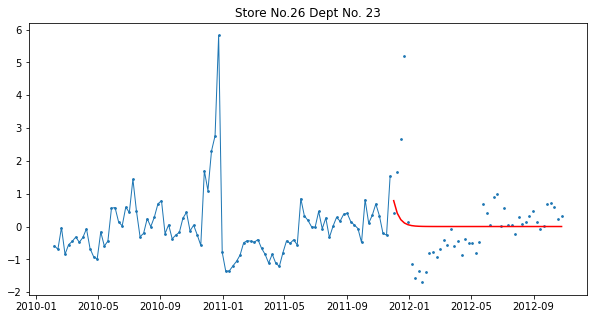

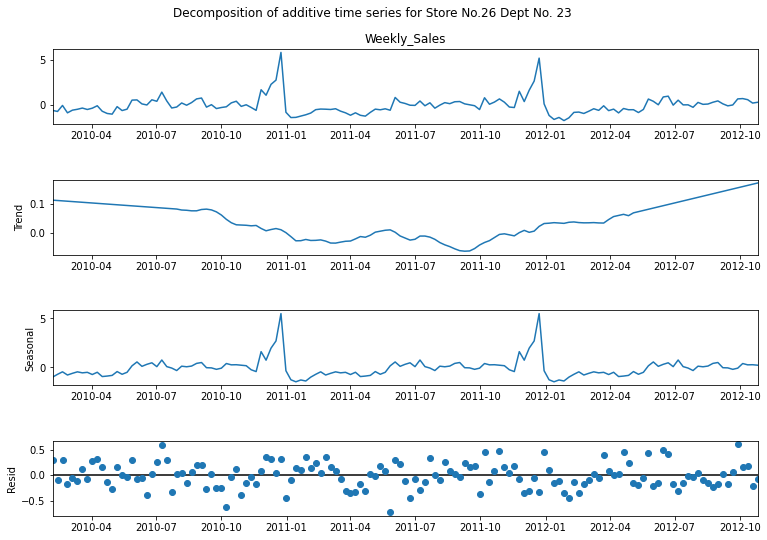

In [107]:
# A random Store
random_store = np.random.choice(range(1, 46))
random_dept = np.random.choice(range(1, 100))
try:
    X = stores_depts[random_store - 1][f"dept_{random_dept}"]
    Y = predictions[random_store - 1][f"dept_{random_dept}"]
    print(fits[random_store - 1][f"dept_{random_dept}"].aicc())
    x_fuller = adfuller(X["Weekly_Sales"])
    print(x_fuller)
    # A visualization
    X_train, X_test = train_test_split(X, test_size= 1/3, shuffle=False)
    plt.figure(figsize = (10, 5))
    plt.scatter(X.index, X["Weekly_Sales"], s = 3)
    plt.plot(X_train.index, X_train["Weekly_Sales"], linewidth = 1)
    plt.plot(X.index[len(X_train.index):] , Y, "r")
    plt.title(f"Store No.{random_store} Dept No. {random_dept}")
    # print(f'Outliers are {percentage[random_store - 1][f"dept_{random_dept}"]}%')
    #print('since our model is stationary the forcasts of future values will eventually converge to the mean and stay there')
except:
    print(f"Store_{i}_dept_{j} data not avialable.---------------------")
else:
    try:
        x_decomp = sm.tsa.seasonal_decompose(X["Weekly_Sales"], extrapolate_trend=8)
    except:
        print(f"Not enough data poinys for Store No.{random_store} Dept No. {random_dept}")
    fig = x_decomp.plot()
    fig.set_figwidth(12)
    fig.set_figheight(8)
    fig.suptitle(f'Decomposition of additive time series for Store No.{random_store} Dept No. {random_dept}')
    plt.show()
#     plt.figure(dpi = 150)
#     plt.scatter(X.index, X["Weekly_Sales"], s = 1)
#     plt.scatter(Y.index, Y["Weekly_Sales"], c = "r", s = 5)
#     plt.title(f"Store No.{random_store} Dept No. {random_dept}")

### Since our model is stationary the forcasts of future values will eventually converge to the mean and stay there

In [81]:
df_1 = stores_depts[1]["dept_3"]
df_1

Store  IsHoliday  Dept  Weekly_Sales  Temperature  Fuel_Price  \
Date                                                                        
2010-02-05      2          0   3.0     -0.047263    -1.808997   -1.515751   
2010-02-12      2          1   3.0     -0.286349    -1.918725   -1.571916   
2010-02-19      2          0   3.0     -0.224759    -1.841270   -1.651483   
2010-02-26      2          0   3.0     -0.144180    -1.427528   -1.541493   
2010-03-05      2          0   3.0     -0.202146    -1.358464   -1.391720   
...           ...        ...   ...           ...          ...         ...   
2012-09-28      2          0   3.0     -0.374667     0.725089    1.044436   
2012-10-05      2          0   3.0     -0.428082     0.132555    0.929766   
2012-10-12      2          0   3.0     -0.520341    -0.467726    0.892323   
2012-10-19      2          0   3.0     -0.488585    -0.008802    0.875941   
2012-10-26      2          0   3.0     -0.528346     0.101572    0.670003   

                 CPI  Unemployment  
Date                                
2010-02-05 -1.126988      1.137696  
2010-02-12 -1.093506      1.137696  
2010-02-19 -1.082644      1.137696  
2010-02-26 -1.075552      1.137696  
2010-03-05 -1.068459      1.137696  
...              ...           ...  
2012-09-28  1.605174     -1.720543  
2012-10-05  1.651116     -2.362387  
2012-10-12  1.697059     -2.362387  
2012-10-19  1.707280     -2.362387  
2012-10-26  1.711547     -2.362387  

[143 rows x 8 columns]

In [82]:
df_1.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [83]:
x=df_1.index
y=df_1['Weekly_Sales']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

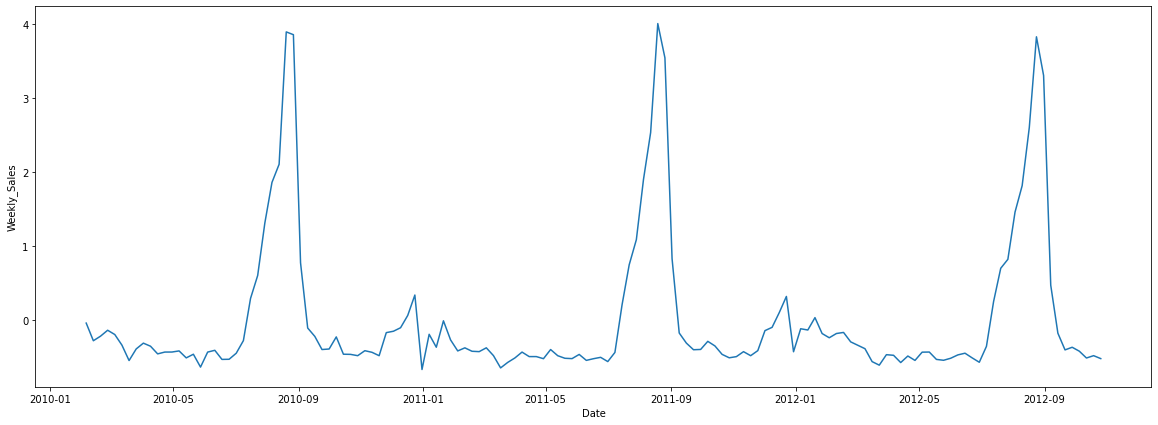

In [84]:
plt.figure(figsize=(20,7))
sns.lineplot(x,y)

In [93]:
train_ts_1, test_ts_1 = train_test_split(df_1, test_size=0.2,shuffle = False)

In [94]:
train_ts_1.sort_index(inplace=True)
test_ts_1.sort_index(inplace=True)

In [95]:
ts1_sales=train_ts_1["Weekly_Sales"]
ts1_sales

Date
2010-02-05   -0.047263
2010-02-12   -0.286349
2010-02-19   -0.224759
2010-02-26   -0.144180
2010-03-05   -0.202146
                ...   
2012-03-09   -0.394198
2012-03-16   -0.569286
2012-03-23   -0.617215
2012-03-30   -0.475205
2012-04-06   -0.483592
Name: Weekly_Sales, Length: 114, dtype: float64

Text(0, 0.5, 'Weekly_Sales')

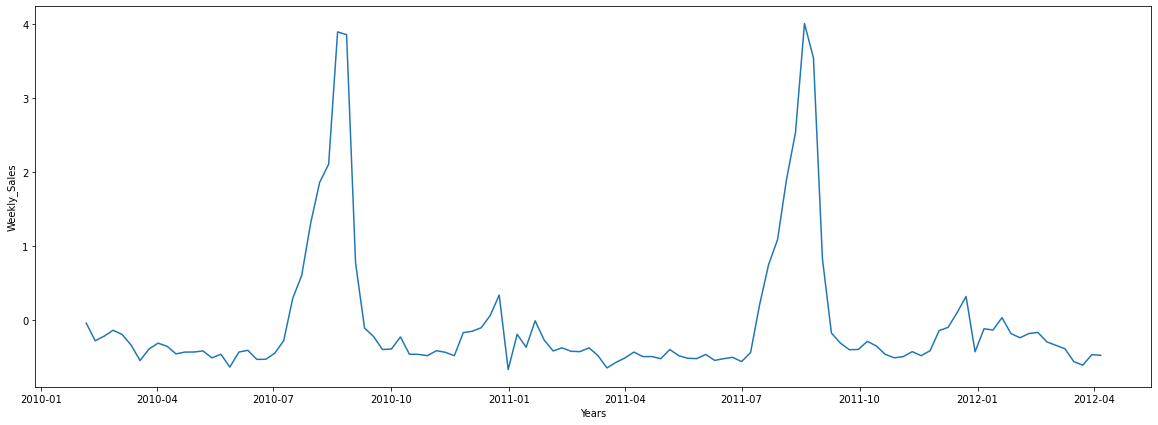

In [96]:
plt.figure(figsize=(20, 7))
plt.plot(ts1_sales)
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')

In [97]:
model_ar = auto_arima(train_ts_1.Weekly_Sales, trace=True, error_action='ignore', suppress_warnings=True)
f = model_ar.fit(train_ts_1.Weekly_Sales)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=149.439, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=310.092, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=172.505, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=208.563, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=308.434, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=154.480, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=154.445, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=151.298, Time=0.68 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=151.348, Time=0.95 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=152.613, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=156.324, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=156.216, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fi

In [98]:
print(f)

 ARIMA(2,0,2)(0,0,0)[0] intercept


In [99]:
f.aicc()

150.22420038294558

In [101]:
pr = model_ar.predict(test_ts_1.shape[0])
pr

array([-0.35545387, -0.15107959,  0.00752026,  0.12451555,  0.20497667,
        0.25440636,  0.2783702 ,  0.28221827,  0.2708877 ,  0.24877501,
        0.21966633,  0.18671426,  0.15245038,  0.11882399,  0.08725829,
        0.05871719,  0.03377672,  0.01269659, -0.00451161, -0.01802177,
       -0.02813789, -0.03524666, -0.03977814, -0.0421745 , -0.04286603,
       -0.04225394, -0.0406988 , -0.03851389, -0.03596249])

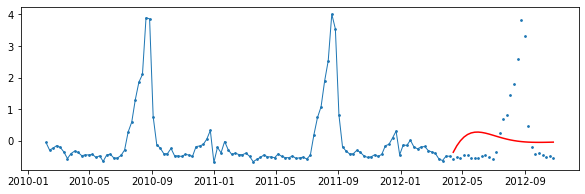

In [105]:
plt.figure(figsize = (10, 3))
plt.scatter(df_1.index, df_1["Weekly_Sales"], s = 3)
plt.plot(train_ts_1.index, train_ts_1["Weekly_Sales"], linewidth = 1)
plt.plot(df_1.index[len(train_ts_1.index):] , pr, "r")

In [80]:
X

Store  IsHoliday  Dept  Weekly_Sales  Temperature  Fuel_Price  \
Date                                                                        
2010-02-05     14          0  16.0     -0.677450    -1.873261   -1.430173   
2010-02-12     14          1  16.0     -0.455390    -1.847449   -1.455002   
2010-02-19     14          0  16.0     -0.624152    -1.629893   -1.518203   
2010-02-26     14          0  16.0     -0.753143    -1.407419   -1.497889   
2010-03-05     14          0  16.0     -0.761603    -1.269756   -1.445973   
...           ...        ...   ...           ...          ...         ...   
2012-09-28     14          0  16.0     -0.863158     0.435668    1.307796   
2012-10-05     14          0  16.0     -0.896596     0.436283    1.280709   
2012-10-12     14          0  16.0     -0.918407    -0.204096    1.314567   
2012-10-19     14          0  16.0     -0.959693    -0.081183    1.244594   
2012-10-26     14          0  16.0     -0.942816     0.065084    1.048219   

                 CPI  Unemployment  
Date                                
2010-02-05 -1.228014      2.266285  
2010-02-12 -1.197100      2.266285  
2010-02-19 -1.182506      2.266285  
2010-02-26 -1.170631      2.266285  
2010-03-05 -1.158757      2.266285  
...              ...           ...  
2012-09-28  1.593370      0.232746  
2012-10-05  1.637004      0.120505  
2012-10-12  1.680637      0.120505  
2012-10-19  1.681635      0.120505  
2012-10-26  1.675528      0.120505  

[143 rows x 8 columns]

In [46]:
X_train

Store  IsHoliday  Dept  Weekly_Sales  Temperature  Fuel_Price  \
Date                                                                        
2010-02-05     11          0  96.0     -1.058575    -2.097735   -1.515751   
2010-02-12     11          1  96.0     -0.200235    -1.941441   -1.571916   
2010-02-19     11          0  96.0     -1.178526    -1.918433   -1.651483   
2010-02-26     11          0  96.0     -1.765830    -1.562209   -1.541493   
2010-03-05     11          0  96.0     -1.459252    -1.469385   -1.391720   
...           ...        ...   ...           ...          ...         ...   
2011-10-28     11          0  96.0     -0.412908     0.014220    0.356415   
2011-11-04     11          0  96.0     -0.211548    -0.900538    0.262807   
2011-11-11     11          0  96.0     -0.604728    -0.656973    0.180900   
2011-11-18     11          0  96.0     -0.675038    -0.500678    0.206642   
2011-11-25     11          1  96.0      3.335487    -0.194437    0.038147   

                 CPI  Unemployment  
Date                                
2010-02-05 -1.120070       0.42709  
2010-02-12 -1.086262       0.42709  
2010-02-19 -1.076093       0.42709  
2010-02-26 -1.069863       0.42709  
2010-03-05 -1.063632       0.42709  
...              ...           ...  
2011-10-28  0.380822       0.04475  
2011-11-04  0.418209       0.04475  
2011-11-11  0.455596       0.04475  
2011-11-18  0.507811       0.04475  
2011-11-25  0.565958       0.04475  

[95 rows x 8 columns]

In [50]:
X.index[len(X_train.index):]

DatetimeIndex(['2011-12-02', '2011-12-09', '2011-12-16', '2011-12-23',
               '2011-12-30', '2012-01-06', '2012-01-13', '2012-01-20',
               '2012-01-27', '2012-02-03', '2012-02-10', '2012-02-17',
               '2012-02-24', '2012-03-02', '2012-03-09', '2012-03-16',
               '2012-03-23', '2012-03-30', '2012-04-06', '2012-04-13',
               '2012-04-20', '2012-04-27', '2012-05-04', '2012-05-11',
               '2012-05-18', '2012-05-25', '2012-06-01', '2012-06-08',
               '2012-06-15', '2012-06-22', '2012-06-29', '2012-07-06',
               '2012-07-13', '2012-07-20', '2012-07-27', '2012-08-03',
               '2012-08-10', '2012-08-17', '2012-08-24', '2012-08-31',
               '2012-09-07', '2012-09-14', '2012-09-21', '2012-09-28',
               '2012-10-05', '2012-10-12', '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [45]:
X.index - X_train.index

ValueError: cannot add indices of unequal length